<a href="https://colab.research.google.com/github/Titaniaurera/deteksifraud/blob/main/deteksi_fraudipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kode ini bertujuan untuk mendeteksi transaksi penipuan pada aplikasi fintech dengan menganalisis pola transaksi yang mencurigakan. Proses ini mencakup pembersihan data, rekayasa fitur (feature engineering), eksplorasi data (EDA), dan pelabelan transaksi yang mencurigakan berdasarkan beberapa aturan yang telah ditentukan.

**Library yang Digunakan**

Kode ini menggunakan beberapa library utama dalam Python, di antaranya:
pandas: Untuk manipulasi data
numpy: Untuk operasi numerik
matplotlib.pyplot dan seaborn: Untuk visualisasi data
sklearn.preprocessing: Untuk normalisasi dan penanganan outlier

**Dataset yang Digunakan**

dim_paper_company: Berisi akun-akun yang sudah tercatat pernah melakukan flag
dim_paper_promotion: Berisi kode promosi dan cashback
fact_paper_digital_payment_request: jumlah keseluruhan biaya yang harus dibayarkan dalam suatu transaksi atau layanan
fact_paper_digital_payment_transaction: berkaitan dengan transaksi pembayaran digital

### **DATA PREPARATION**

**dim_paper_campany**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/dim__paper__company.csv')
df

,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,company_registered_datetime
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,2023-02-01 17:18:59
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-06-08 12:53:10
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-03-03 00:46:29
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2022-12-20 15:06:00
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ THREE MONTHS,2021-12-07 22:39:58
...,...,...,...,...,...,...,...,...,...,...,...
49995,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,FREE,2021-12-10 13:27:41
49996,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,2023-05-30 16:28:48
49997,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,VALIDASI_BERHASIL,BELUM_VALIDASI,PT,1.0,1.0,0.0,1.0,0.0,FREE,2023-01-15 21:38:22
49998,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,VALIDASI_BERHASIL,DOKUMEN_KURANG_LENGKAP,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ SIX MONTHS,2021-10-30 17:50:55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   company_id                   50000 non-null  object 
 1   company_kyc_status_name      50000 non-null  object 
 2   company_kyb_status_name      50000 non-null  object 
 3   company_type_group           49999 non-null  object 
 4   company_phone_verified_flag  50000 non-null  float64
 5   company_email_verified_flag  50000 non-null  float64
 6   user_fraud_flag              50000 non-null  float64
 7   testing_account_flag         50000 non-null  float64
 8   blacklist_account_flag       50000 non-null  float64
 9   package_active_name          50000 non-null  object 
 10  company_registered_datetime  50000 non-null  object 
dtypes: float64(5), object(6)
memory usage: 4.2+ MB


In [ ]:
df.isnull().sum()

,0
company_id,0
company_kyc_status_name,0
company_kyb_status_name,0
company_type_group,1
company_phone_verified_flag,0
company_email_verified_flag,0
user_fraud_flag,0
testing_account_flag,0
blacklist_account_flag,0
package_active_name,0


**dim_paper_promotion**

In [ ]:
db=pd.read_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/dim__paper__promotion.csv')
db



,dpt_promotion_id,promotion_code,promotion_name,transaction_promo_cashback_amount
0,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,0.0
...,...,...,...,...
49995,NaN,NaN,NaN,0.0
49996,NaN,NaN,NaN,0.0
49997,NaN,NaN,NaN,0.0
49998,NaN,NaN,NaN,0.0


In [ ]:
columns_to_fill = ['dpt_promotion_id', 'promotion_code', 'promotion_name','transaction_promo_cashback_amount' ]
db[columns_to_fill] = db[columns_to_fill].fillna('unknown')
db.to_csv('/content/drive/MyDrive/updated_dim__paper__promotion.csv', index=False)

pd.read_csv('/content/drive/MyDrive/updated_dim__paper__promotion.csv')

,dpt_promotion_id,promotion_code,promotion_name,transaction_promo_cashback_amount
0,unknown,unknown,unknown,0.0
1,unknown,unknown,unknown,0.0
2,unknown,unknown,unknown,0.0
3,unknown,unknown,unknown,0.0
4,unknown,unknown,unknown,0.0
...,...,...,...,...
49995,unknown,unknown,unknown,0.0
49996,unknown,unknown,unknown,0.0
49997,unknown,unknown,unknown,0.0
49998,unknown,unknown,unknown,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   company_id                   50000 non-null  object 
 1   company_kyc_status_name      50000 non-null  object 
 2   company_kyb_status_name      50000 non-null  object 
 3   company_type_group           49999 non-null  object 
 4   company_phone_verified_flag  50000 non-null  float64
 5   company_email_verified_flag  50000 non-null  float64
 6   user_fraud_flag              50000 non-null  float64
 7   testing_account_flag         50000 non-null  float64
 8   blacklist_account_flag       50000 non-null  float64
 9   package_active_name          50000 non-null  object 
 10  company_registered_datetime  50000 non-null  object 
dtypes: float64(5), object(6)
memory usage: 4.2+ MB


**fact__paper__digital_payment_request**

In [ ]:
import pandas as pd
pd.read_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/fact__paper__digital_payment_request.csv')


,dpt_id,total_fee_amount,document_type_name
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,380.0,PAY-OUT
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,273.6,PAY-OUT
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,19190.0,PAY-OUT
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,450.0,PAY-IN
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,1000.0,PAY-IN
...,...,...,...
49995,4da123d84a819edf166f67a9cc0c197f81967aa9717ed5...,1000.0,PAY-IN
49996,0b358a09e15d062e1d9e0fafb8a986d802c2044b150a6e...,739500.0,PAY-OUT
49997,ba67db08614a504cc5c9042cc61c914fa82748d526f0f3...,31500.0,PAY-IN
49998,351da251d731cba588418e4a175460cc822ecbeb751751...,124500.0,PAY-OUT


In [ ]:
dc.isnull().sum()

,0
dpt_id,0
total_fee_amount,0
document_type_name,0


**fact__paper__digital_payment_transaction**

In [ ]:
tr=pd.read_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/fact__paper__digital_payment_transaction.csv')
tr

,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,NaN,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,NaN,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,NaN,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,NaN,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,NaN,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498
...,...,...,...,...,...,...,...,...,...
49995,4da123d84a819edf166f67a9cc0c197f81967aa9717ed5...,NaN,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,1000000.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-06-19 13:52:12.117180,2023-06-19 13:53:09.785285
49996,0b358a09e15d062e1d9e0fafb8a986d802c2044b150a6e...,NaN,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,50039500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA_CREDIT_CARD,2023-06-02 11:53:06.595470,2023-06-02 11:56:42.181481
49997,ba67db08614a504cc5c9042cc61c914fa82748d526f0f3...,NaN,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,4531500.0,QRIS,QRIS,2023-10-23 14:06:05.090016,2023-10-23 14:06:05.090016
49998,351da251d731cba588418e4a175460cc822ecbeb751751...,NaN,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,8424500.0,CREDIT_CARD,MASTERCARD,2023-11-05 16:24:20.163636,2023-11-05 16:25:34.101821


In [ ]:
columns_to_fill = ['dpt_promotion_id']
tr[columns_to_fill] = db[columns_to_fill].fillna('unknown')
tr.to_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_update', index=False)

pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_update')

,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,unknown,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,unknown,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,unknown,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,unknown,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,unknown,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498
...,...,...,...,...,...,...,...,...,...
49995,4da123d84a819edf166f67a9cc0c197f81967aa9717ed5...,unknown,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,1000000.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-06-19 13:52:12.117180,2023-06-19 13:53:09.785285
49996,0b358a09e15d062e1d9e0fafb8a986d802c2044b150a6e...,unknown,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,50039500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA_CREDIT_CARD,2023-06-02 11:53:06.595470,2023-06-02 11:56:42.181481
49997,ba67db08614a504cc5c9042cc61c914fa82748d526f0f3...,unknown,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,4531500.0,QRIS,QRIS,2023-10-23 14:06:05.090016,2023-10-23 14:06:05.090016
49998,351da251d731cba588418e4a175460cc822ecbeb751751...,unknown,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,8424500.0,CREDIT_CARD,MASTERCARD,2023-11-05 16:24:20.163636,2023-11-05 16:25:34.101821


In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dpt_id                        50000 non-null  object 
 1   dpt_promotion_id              50000 non-null  object 
 2   buyer_id                      50000 non-null  object 
 3   seller_id                     50000 non-null  object 
 4   transaction_amount            50000 non-null  float64
 5   payment_method_name           50000 non-null  object 
 6   payment_provider_name         50000 non-null  object 
 7   transaction_created_datetime  50000 non-null  object 
 8   transaction_updated_datetime  50000 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
tr.isnull().sum()

,0
dpt_id,0
dpt_promotion_id,0
buyer_id,0
seller_id,0
transaction_amount,0
payment_method_name,0
payment_provider_name,0
transaction_created_datetime,0
transaction_updated_datetime,0


**Hashing**

Untuk melakukan pengecekan apakah Promotion ID yang ada di database promotion sam dengan di database transaction

In [ ]:
import hashlib

# String yang akan diuji
base_string = "promotion-339944981"

# Hash menggunakan SHA-256
hashed_string = hashlib.sha256(base_string.encode()).hexdigest()

# P.ID dari contoh yang diberikan
tes = "d6d58a75dd5d629a6db1cb9f383f468502bfe507d1352a7c263d579b2257013f"

# Menampilkan hasil hash dan perbandingan dengan P.ID
print("Hashed String:", hashed_string)
print("Is Hashed String equal to P.ID 1:", hashed_string == tes)


Hashed String: d6d58a75dd5d629a6db1cb9f383f468502bfe507d1352a7c263d579b2257013f
Is Hashed String equal to P.ID 1: True


In [ ]:
import hashlib

original_string = "promotion-339944981"

hashed_value = hashlib.sha256(original_string.encode()).hexdigest()

expected_hash = "d6d58a75dd5d629a6db1cb9f383f468502bfe507d1352a7c263d579b2257013f"

print("Hashed Value:", hashed_value)
print("Does the hashed value match the expected ID?", hashed_value == expected_hash)


Hashed Value: d6d58a75dd5d629a6db1cb9f383f468502bfe507d1352a7c263d579b2257013f
Does the hashed value match the expected ID? True


**Merge**

Menyatukan keseluruhan data berdasarkan prymary keynya

In [ ]:
import pandas as pd

# Path ke file
path_company = '/content/drive/MyDrive - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/dim__paper__company.csv'
path_promotion = '/content/drive/MyDrive/updated_dim__paper__promotion.csv'
path_payment_request = '/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/fact__paper__digital_payment_request.csv'
path_transaction = '/content/drive/MyDrive/fact__paper__digital_payment_transaction_update'
company_df = pd.read_csv(path_company)
promotion_df = pd.read_csv(path_promotion)
payment_request_df = pd.read_csv(path_payment_request)
transaction_df = pd.read_csv(path_transaction)

# Menghapus kolom dpt_promotion yang ter-enkripsi dari transaction_df
transaction_df = transaction_df.drop(columns=['dpt_promotion'], errors='ignore')

# Gabungkan semua kolom (tanpa kolom dpt_promotion dari transaction_df)
combined_df = pd.concat([company_df, promotion_df, payment_request_df, transaction_df], axis=1)

# Ganti nama kolom yang duplikat agar kembali ke nama yang sesuai
combined_df = combined_df.rename(columns={
    'dpt_id_transaction': 'dpt_id',
    'dpt_promotion_id_transaction': 'dpt_promotion_id'
})

# Simpan dataset gabungan ke file baru
output_path = '/content/drive/MyDrive/combined_dataset.csv'
combined_df.to_csv(output_path, index=False)

print(f"Dataset gabungan telah disimpan di: {output_path}")


Dataset gabungan telah disimpan di: /content/drive/MyDrive/combined_dataset.csv


In [ ]:

pd.read_csv('/content/drive/MyDrive/combined_dataset.csv')

,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,...,document_type_name,dpt_id.1,dpt_promotion_id.1,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,...,PAY-OUT,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,unknown,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,PAY-OUT,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,unknown,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,PAY-OUT,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,unknown,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,PAY-IN,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,unknown,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ THREE MONTHS,...,PAY-IN,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,unknown,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,FREE,...,PAY-IN,4da123d84a819edf166f67a9cc0c197f81967aa9717ed5...,unknown,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,1000000.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-06-19 13:52:12.117180,2023-06-19 13:53:09.785285
49996,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,...,PAY-OUT,0b358a09e15d062e1d9e0fafb8a986d802c2044b150a6e...,unknown,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,50039500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA_CREDIT_CARD,2023-06-02 11:53:06.595470,2023-06-02 11:56:42.181481
49997,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,VALIDASI_BERHASIL,BELUM_VALIDASI,PT,1.0,1.0,0.0,1.0,0.0,FREE,...,PAY-IN,ba67db08614a504cc5c9042cc61c914fa82748d526f0f3...,unknown,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,4531500.0,QRIS,QRIS,2023-10-23 14:06:05.090016,2023-10-23 14:06:05.090016
49998,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,VALIDASI_BERHASIL,DOKUMEN_KURANG_LENGKAP,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ SIX MONTHS,...,PAY-OUT,351da251d731cba588418e4a175460cc822ecbeb751751...,unknown,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,8424500.0,CREDIT_CARD,MASTERCARD,2023-11-05 16:24:20.163636,2023-11-05 16:25:34.101821


In [ ]:
import pandas as pd

# Path ke file yang sudah digabungkan
input_path = '/content/drive/MyDrive/combined_dataset.csv'

# Membaca file CSV yang sudah digabungkan
df = pd.read_csv(input_path)

#kolom-kolom yang diinginkan sesuai permintaan
required_columns = [
    'dpt_id', 'dpt_promotion_id', 'buyer_id', 'seller_id','company_kyc_status_name'	, 'transaction_amount',
    'payment_method_name', 'payment_provider_name', 'transaction_created_datetime',
    'transaction_updated_datetime', 'total_fee_amount', 'document_type_name',
    'promotion_code', 'promotion_name', 'transaction_promo_cashback_amount'
]

# Seleksi kolom yang ada dalam DataFrame
df_filtered = df[required_columns]

# Menghapus kolom yang terduplikat jika ada (misalnya 'dpt_id' dan 'dpt_promotion_id' yang duplikat)
df_filtered = df_filtered.loc[:, ~df_filtered.columns.duplicated()]

# dataset yang sudah diproses ke file baru
output_path = '/content/drive/MyDrive/processed_combined_dataset.csv'
df_filtered.to_csv(output_path, index=False)

pd.read_csv('/content/drive/MyDrive/processed_combined_dataset.csv')


,dpt_id,dpt_promotion_id,buyer_id,seller_id,company_kyc_status_name,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime,total_fee_amount,document_type_name,promotion_code,promotion_name,transaction_promo_cashback_amount
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,unknown,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,AKUN_DIBEKUKAN,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352,380.0,PAY-OUT,unknown,unknown,0.0
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,unknown,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,BELUM_VALIDASI,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184,273.6,PAY-OUT,unknown,unknown,0.0
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,unknown,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,BELUM_VALIDASI,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359,19190.0,PAY-OUT,unknown,unknown,0.0
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,unknown,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121,450.0,PAY-IN,unknown,unknown,0.0
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,unknown,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498,1000.0,PAY-IN,unknown,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4da123d84a819edf166f67a9cc0c197f81967aa9717ed5...,unknown,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,VALIDASI_BERHASIL,1000000.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-06-19 13:52:12.117180,2023-06-19 13:53:09.785285,1000.0,PAY-IN,unknown,unknown,0.0
49996,0b358a09e15d062e1d9e0fafb8a986d802c2044b150a6e...,unknown,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,AKUN_DIBEKUKAN,50039500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA_CREDIT_CARD,2023-06-02 11:53:06.595470,2023-06-02 11:56:42.181481,739500.0,PAY-OUT,unknown,unknown,0.0
49997,ba67db08614a504cc5c9042cc61c914fa82748d526f0f3...,unknown,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,VALIDASI_BERHASIL,4531500.0,QRIS,QRIS,2023-10-23 14:06:05.090016,2023-10-23 14:06:05.090016,31500.0,PAY-IN,unknown,unknown,0.0
49998,351da251d731cba588418e4a175460cc822ecbeb751751...,unknown,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,VALIDASI_BERHASIL,8424500.0,CREDIT_CARD,MASTERCARD,2023-11-05 16:24:20.163636,2023-11-05 16:25:34.101821,124500.0,PAY-OUT,unknown,unknown,0.0


**FEATURE ENGINEERING**

Membuat kolom kolom baru didapatkan dari kolom kolom yang sudah ada

**Buyer-Seller Relationship Score**

In [ ]:
import pandas as pd

# Mengimpor data transaksi
digital_payment_df = pd.read_csv('/content/drive/MyDrive/combined_dataset.csv')  # Sesuaikan dengan path data Anda

# Mengonversi kolom datetime ke tipe datetime
digital_payment_df['transaction_created_datetime'] = pd.to_datetime(digital_payment_df['transaction_created_datetime'])

# Menghitung jumlah transaksi harian antara buyer dan seller
daily_transaction_count = digital_payment_df.groupby(['buyer_id', 'seller_id']).size().reset_index(name='daily_transaction_count')

# Menambahkan kolom transaction_count_fraud dengan kondisi transaksi lebih dari atau sama dengan 30 dianggap fraud
daily_transaction_count['transaction_count_fraud'] = daily_transaction_count['daily_transaction_count'] > 1250

# Merge kembali ke dataset asli untuk mencetak semua kolom dengan fitur baru
digital_payment_df = pd.merge(
    digital_payment_df,
    daily_transaction_count[['buyer_id', 'seller_id', 'daily_transaction_count', 'transaction_count_fraud']],
    on=['buyer_id', 'seller_id'],  # Menggabungkan berdasarkan buyer_id dan seller_id
    how='left'  # Melakukan merge secara left join agar data original tetap ada
)

# Menampilkan jumlah True dan False pada kolom 'transaction_count_fraud'
fraud_counts = digital_payment_df['transaction_count_fraud'].value_counts()
print(f'Jumlah True (Anomali): {fraud_counts.get(True, 0)}')
print(f'Jumlah False (Normal): {fraud_counts.get(False, 0)}')

# Menyimpan dataset dengan kolom baru ke file CSV
output_path = 'fact__paper__digital_payment_transaction1.csv'  # Sesuaikan dengan path output yang diinginkan
digital_payment_df.to_csv(output_path, index=False)

# Menampilkan data dari file output yang baru
output_df = pd.read_csv(output_path)
pd.read_csv('fact__paper__digital_payment_transaction1.csv')


Jumlah True (Anomali): 1266
Jumlah False (Normal): 48734


,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,...,dpt_promotion_id.1,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime,daily_transaction_count,transaction_count_fraud
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,...,unknown,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352,18,False
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,unknown,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184,13,False
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,unknown,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359,7,False
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,unknown,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121,11,False
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ THREE MONTHS,...,unknown,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498,7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,FREE,...,unknown,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,1000000.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-06-19 13:52:12.117180,2023-06-19 13:53:09.785285,6,False
49996,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,...,unknown,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,50039500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA_CREDIT_CARD,2023-06-02 11:53:06.595470,2023-06-02 11:56:42.181481,9,False
49997,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,VALIDASI_BERHASIL,BELUM_VALIDASI,PT,1.0,1.0,0.0,1.0,0.0,FREE,...,unknown,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,4531500.0,QRIS,QRIS,2023-10-23 14:06:05.090016,2023-10-23 14:06:05.090016,124,False
49998,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,VALIDASI_BERHASIL,DOKUMEN_KURANG_LENGKAP,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ SIX MONTHS,...,unknown,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,8424500.0,CREDIT_CARD,MASTERCARD,2023-11-05 16:24:20.163636,2023-11-05 16:25:34.101821,16,False


##**Transaction Frequency Metrics**

In [ ]:
import pandas as pd

# Mengimpor data transaksi
file_path = 'fact__paper__digital_payment_transaction1.csv'  # Sesuaikan path file Anda
df_transactions = pd.read_csv(file_path)

# Mengonversi kolom datetime ke tipe datetime
df_transactions['transaction_created_datetime'] = pd.to_datetime(df_transactions['transaction_created_datetime'])

# Menghitung jumlah transaksi harian antara buyer dan seller
df_transactions['daily_transaction_count'] = df_transactions.groupby(['buyer_id', 'seller_id'])['transaction_created_datetime'].transform('count')

# Menentukan kolom 'frequency_fraud' berdasarkan kondisi kurang dari 60 detik atau lebih dari 604,800 detik
df_transactions['time_diff'] = df_transactions.groupby('buyer_id')['transaction_created_datetime'].diff().dt.total_seconds()
df_transactions['frequency_fraud'] = df_transactions['time_diff'].apply(
    lambda x: 'fraud' if (x is not None and (x < 60 or x > 604800)) else 'non-fraud'
)

# Menampilkan jumlah fraud dan non-fraud
fraud_counts = df_transactions['frequency_fraud'].value_counts()
print(f"Jumlah fraud: {fraud_counts.get('fraud', 0)}")
print(f"Jumlah non-fraud: {fraud_counts.get('non-fraud', 0)}")

# Menyimpan data transaksi dengan kolom frequency_fraud dan daily_transaction_count ke file CSV baru
output_path = '/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection.csv'
df_transactions.to_csv(output_path, index=False)

pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection.csv')


Jumlah fraud: 35979
Jumlah non-fraud: 14021


,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,...,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime,daily_transaction_count,transaction_count_fraud,time_diff,frequency_fraud
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352,18,False,NaN,non-fraud
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184,13,False,NaN,non-fraud
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359,7,False,NaN,non-fraud
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121,11,False,NaN,non-fraud
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ THREE MONTHS,...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498,7,False,NaN,non-fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,FREE,...,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,1000000.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-06-19 13:52:12.117180,2023-06-19 13:53:09.785285,6,False,-5.707722e+06,fraud
49996,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,50039500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA_CREDIT_CARD,2023-06-02 11:53:06.595470,2023-06-02 11:56:42.181481,9,False,-1.674449e+06,fraud
49997,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,VALIDASI_BERHASIL,BELUM_VALIDASI,PT,1.0,1.0,0.0,1.0,0.0,FREE,...,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,4531500.0,QRIS,QRIS,2023-10-23 14:06:05.090016,2023-10-23 14:06:05.090016,124,False,-5.329163e+06,fraud
49998,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,VALIDASI_BERHASIL,DOKUMEN_KURANG_LENGKAP,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ SIX MONTHS,...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,8424500.0,CREDIT_CARD,MASTERCARD,2023-11-05 16:24:20.163636,2023-11-05 16:25:34.101821,16,False,2.031354e+07,fraud


##**Indikator Penyalahgunaan Promosi**

In [ ]:
import pandas as pd

# Membaca dataset
file_path = '/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection.csv'
df = pd.read_csv(file_path)

# Menambahkan kolom 'promotion_fraud_label'
def label_fraud(row):
    if row['promotion_code'] == 'unknown' and not pd.isna(row['transaction_promo_cashback_amount']) and row['transaction_promo_cashback_amount'] > 0:
        return 'fraud'
    elif row['promotion_code'] != 'unknown' and not pd.isna(row['transaction_promo_cashback_amount']) and row['transaction_promo_cashback_amount'] > 0:
        return 'not fraud'
    elif row['promotion_code'] == 'unknown' and (pd.isna(row['transaction_promo_cashback_amount']) or row['transaction_promo_cashback_amount'] == 0):
        return 'unknown'
    else:
        return 'not fraud'

df['promotion_fraud_label'] = df.apply(label_fraud, axis=1)

# Menyimpan dataset dengan fitur baru
output_path = '/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv'
df.to_csv(output_path, index=False)

pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv')


,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,...,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime,daily_transaction_count,transaction_count_fraud,time_diff,frequency_fraud,promotion_fraud_label
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,...,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352,18,False,NaN,non-fraud,unknown
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184,13,False,NaN,non-fraud,unknown
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359,7,False,NaN,non-fraud,unknown
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121,11,False,NaN,non-fraud,unknown
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ THREE MONTHS,...,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498,7,False,NaN,non-fraud,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,FREE,...,1000000.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-06-19 13:52:12.117180,2023-06-19 13:53:09.785285,6,False,-5.707722e+06,fraud,unknown
49996,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,...,50039500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA_CREDIT_CARD,2023-06-02 11:53:06.595470,2023-06-02 11:56:42.181481,9,False,-1.674449e+06,fraud,unknown
49997,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,VALIDASI_BERHASIL,BELUM_VALIDASI,PT,1.0,1.0,0.0,1.0,0.0,FREE,...,4531500.0,QRIS,QRIS,2023-10-23 14:06:05.090016,2023-10-23 14:06:05.090016,124,False,-5.329163e+06,fraud,unknown
49998,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,VALIDASI_BERHASIL,DOKUMEN_KURANG_LENGKAP,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ SIX MONTHS,...,8424500.0,CREDIT_CARD,MASTERCARD,2023-11-05 16:24:20.163636,2023-11-05 16:25:34.101821,16,False,2.031354e+07,fraud,unknown


Memilih kolom kolom yang relevan

In [ ]:
import pandas as pd

# Path to the dataset
file_path = '/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv'

# Load the dataset

df = pd.read_csv(file_path)

# Columns to retain and order
columns_to_keep = [
    'company_id', 'company_kyc_status_name', 'company_kyb_status_name',
    'company_type_group', 'company_phone_verified_flag',
    'company_email_verified_flag', 'user_fraud_flag',
    'testing_account_flag', 'blacklist_account_flag', 'package_active_name',
    'company_registered_datetime', 'dpt_id', 'dpt_promotion_id', 'buyer_id',
    'seller_id', 'transaction_amount', 'payment_method_name',
    'payment_provider_name', 'transaction_created_datetime',
    'transaction_updated_datetime', 'time_diff', 'frequency_fraud',
    'daily_transaction_count', 'transaction_count_fraud',
    'total_fee_amount', 'document_type_name', 'promotion_code',
    'promotion_name', 'transaction_promo_cashback_amount',
    'promotion_fraud_label'
]

# Reorder and drop unnecessary columns
df = df[columns_to_keep]

# Save the cleaned dataset
output_path = '/content/drive/MyDrive/cleaned_merged2.csv'
df.to_csv(output_path, index=False)
pd.read_csv('/content/drive/MyDrive/cleaned_merged2.csv')


,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,...,time_diff,frequency_fraud,daily_transaction_count,transaction_count_fraud,total_fee_amount,document_type_name,promotion_code,promotion_name,transaction_promo_cashback_amount,promotion_fraud_label
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,...,NaN,non-fraud,18,False,380.0,PAY-OUT,unknown,unknown,0.0,unknown
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,NaN,non-fraud,13,False,273.6,PAY-OUT,unknown,unknown,0.0,unknown
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,NaN,non-fraud,7,False,19190.0,PAY-OUT,unknown,unknown,0.0,unknown
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,NaN,non-fraud,11,False,450.0,PAY-IN,unknown,unknown,0.0,unknown
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ THREE MONTHS,...,NaN,non-fraud,7,False,1000.0,PAY-IN,unknown,unknown,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,FREE,...,-5.707722e+06,fraud,6,False,1000.0,PAY-IN,unknown,unknown,0.0,unknown
49996,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,...,-1.674449e+06,fraud,9,False,739500.0,PAY-OUT,unknown,unknown,0.0,unknown
49997,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,VALIDASI_BERHASIL,BELUM_VALIDASI,PT,1.0,1.0,0.0,1.0,0.0,FREE,...,-5.329163e+06,fraud,124,False,31500.0,PAY-IN,unknown,unknown,0.0,unknown
49998,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,VALIDASI_BERHASIL,DOKUMEN_KURANG_LENGKAP,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ SIX MONTHS,...,2.031354e+07,fraud,16,False,124500.0,PAY-OUT,unknown,unknown,0.0,unknown


Melakukan pelabelan angka pada user_fraud_flag

In [ ]:
import pandas as pd

# Path to the dataset
file_path = '/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Columns to retain and order
columns_to_keep = [
    'company_id', 'company_kyc_status_name', 'company_kyb_status_name',
    'company_type_group', 'company_phone_verified_flag',
    'company_email_verified_flag', 'user_fraud_flag',
    'testing_account_flag', 'blacklist_account_flag', 'package_active_name',
    'company_registered_datetime', 'dpt_id', 'dpt_promotion_id', 'buyer_id',
    'seller_id', 'transaction_amount', 'payment_method_name',
    'payment_provider_name', 'transaction_created_datetime',
    'transaction_updated_datetime', 'time_diff', 'frequency_fraud',
    'daily_transaction_count', 'transaction_count_fraud',
    'total_fee_amount', 'document_type_name', 'promotion_code',
    'promotion_name', 'transaction_promo_cashback_amount',
    'promotion_fraud_label'
]

# Reorder and drop unnecessary columns
df = df[columns_to_keep]

# Convert 'user_fraud_flag' to Boolean (1 and 0)
df['user_fraud_flag'] = df['user_fraud_flag'].apply(lambda x: 1 if x == 1.0 else 0)

# Save the cleaned dataset
output_path = '/content/drive/MyDrive/cleaned_merged3.csv'



                                          company_id company_kyc_status_name  \
0  bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...          AKUN_DIBEKUKAN   
1  09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...          BELUM_VALIDASI   
2  25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...          BELUM_VALIDASI   
3  5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...          BELUM_VALIDASI   
4  5c19a13a9b229340b584f621b648f4dec7491e12368392...       VALIDASI_BERHASIL   

  company_kyb_status_name company_type_group  company_phone_verified_flag  \
0          BELUM_VALIDASI         PERORANGAN                          1.0   
1          BELUM_VALIDASI         PERORANGAN                          1.0   
2          BELUM_VALIDASI         PERORANGAN                          1.0   
3          BELUM_VALIDASI         PERORANGAN                          1.0   
4          BELUM_VALIDASI         PERORANGAN                          1.0   

   company_email_verified_flag  user_fraud_flag  testing

In [ ]:
print(df.columns)

Index(['company_id', 'company_kyc_status_name', 'company_kyb_status_name',
       'company_type_group', 'company_phone_verified_flag',
       'company_email_verified_flag', 'user_fraud_flag',
       'testing_account_flag', 'blacklist_account_flag', 'package_active_name',
       'company_registered_datetime', 'dpt_id', 'dpt_promotion_id', 'buyer_id',
       'seller_id', 'transaction_amount', 'payment_method_name',
       'payment_provider_name', 'transaction_created_datetime',
       'transaction_updated_datetime', 'time_diff', 'frequency_fraud',
       'daily_transaction_count', 'transaction_count_fraud',
       'total_fee_amount', 'document_type_name', 'promotion_code',
       'promotion_name', 'transaction_promo_cashback_amount',
       'promotion_fraud_label'],
      dtype='object')


##**PENANGANAN OUTLIER**

In [ ]:
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

# 1. Membaca dataset
tr = pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv')

# 2. Menyaring kolom yang ingin diproses (Kolom yang numerik dan perlu penanganan outlier dan normalisasi)
columns_to_process = ['transaction_amount', 'total_fee_amount', 'daily_transaction_count', 'time_diff']

# 3. Menyaring outlier menggunakan Z-score untuk kolom yang dipilih
tr_zscore = tr[columns_to_process].apply(zscore)  # Menghitung Z-score untuk kolom-kolom yang dipilih

# 4. Identifikasi outlier (misalnya, Z-score lebih besar dari 3 atau lebih kecil dari -3)
outlier_mask = (tr_zscore.abs() > 3).any(axis=1)  # Jika Z-score lebih besar dari 3 atau kurang dari -3, dianggap outlier

# 5. Mengganti outlier dengan nilai rata-rata kolom masing-masing
for col in columns_to_process:
    mean_value = tr[col].mean()  # Menghitung rata-rata kolom
    tr[col] = tr[col].where(~outlier_mask, mean_value)  # Ganti outlier dengan rata-rata kolom

# 6. Normalisasi kolom numerik yang sudah diubah (hanya kolom yang diproses)
scaler = MinMaxScaler()
tr[columns_to_process] = scaler.fit_transform(tr[columns_to_process])  # Normalisasi hanya pada kolom yang diproses

# 7. Menyimpan dataset yang sudah diubah (outlier diganti dengan rata-rata dan dinormalisasi) ke file baru
output_file = '/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/outlier.csv'
tr.to_csv(output_file, index=False)

print(f"Data dengan outlier yang diganti dengan rata-rata dan kolom-kolom dinormalisasi telah disimpan di {output_file}")


Data dengan outlier yang diganti dengan rata-rata dan kolom-kolom dinormalisasi telah disimpan di /content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/outlier.csv


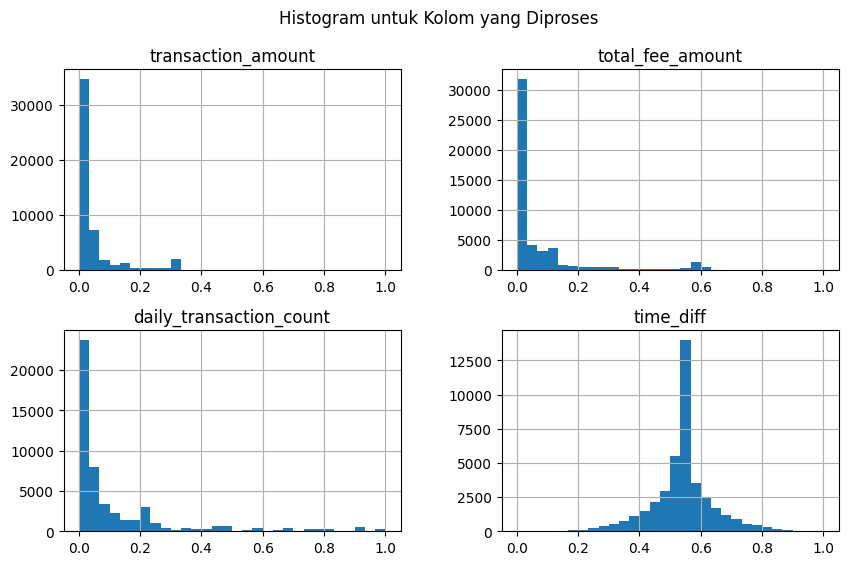

In [ ]:
import matplotlib.pyplot as plt

tr[columns_to_process].hist(bins=30, figsize=(10, 6))
plt.suptitle("Histogram untuk Kolom yang Diproses")
plt.show()


In [ ]:
pd.read_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/outlier.csv')

,dpt_id,dpt_promotion_id,buyer_id,seller_id,company_kyc_status_name,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime,total_fee_amount,document_type_name,promotion_code,promotion_name,transaction_promo_cashback_amount,daily_transaction_count,transaction_count_fraud,time_diff,frequency_fraud,promotion_fraud_label
0,befdc59cf11ec39defab73c7baa0bd1c16ea7e003b59af...,unknown,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,VALIDASI_BERHASIL,0.000327,QRIS,QRIS,2023-12-27 08:47:56.463138,2023-12-27 08:48:03.576944,0.000283,PAY-IN,unknown,unknown,0.0,0.003125,False,NaN,non-fraud,unknown
1,2bc105494f6030d5194fc6fdc50d9acede7d122dd80b3a...,unknown,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,VALIDASI_BERHASIL,0.000490,QRIS,QRIS,2023-12-28 11:30:42.785083,2023-12-28 11:30:49.305502,0.000424,PAY-IN,unknown,unknown,0.0,0.003125,False,0.002231,non-fraud,unknown
2,d8c359cc9de4f730939cfa6c5b50bac2215cf994a30816...,unknown,001046b5061e28476b83fe2335b04d3210bed72a2fee17...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,VALIDASI_BERHASIL,0.649353,BANK_TRANSFER,BCA_MANUAL,2023-08-13 11:50:37.122442,2023-08-13 13:04:54.522228,0.000000,PAY-OUT,unknown,unknown,0.0,0.003125,False,NaN,non-fraud,unknown
3,769c7fdcc0e36175c9363c6d822ebb5b9c8748acb8c12e...,unknown,001046b5061e28476b83fe2335b04d3210bed72a2fee17...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,VALIDASI_BERHASIL,0.974026,BANK_TRANSFER,BRI,2023-12-29 19:10:25.077279,2023-12-29 19:29:08.463497,0.000000,PAY-OUT,unknown,unknown,0.0,0.003125,False,0.277173,fraud,unknown
4,d808c4f7daf19127c77a79dffadf947d9a5d4fa4a9ecb7...,unknown,00119737eef11ff1d30c2061dd1e19c06d963d5a125c92...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,VALIDASI_BERHASIL,0.065877,CREDIT_CARD,MASTERCARD,2023-05-05 10:12:38.083254,2023-05-31 09:19:27.323998,0.117101,PAY-OUT,unknown,unknown,0.0,0.000000,False,NaN,non-fraud,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3220d105503b34c8a43da87b7ac5365923742d74e699ae...,unknown,fff5f7cf3deff1c2acad4533c4b845f8f2c0c05168f668...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,VALIDASI_BERHASIL,0.032955,CREDIT_CARD,MASTERCARD,2023-11-27 13:27:35.604107,2023-11-27 13:30:18.395752,0.060569,PAY-OUT,unknown,unknown,0.0,0.000000,False,NaN,non-fraud,unknown
49996,0785c548ad9260f4c65b37836520e3781c9fd1cd441431...,unknown,fff77b856ac2478f8911b9cddf65980ac7fdc4d700e354...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,VALIDASI_BERHASIL,0.009178,CREDIT_CARD,VISA,2023-11-30 18:00:45.414410,2023-11-30 18:01:40.457680,0.016869,PAY-OUT,unknown,unknown,0.0,0.000000,False,NaN,non-fraud,unknown
49997,7862efbfd8e68bd315332118e2c1dfb7e825ceb06819b0...,unknown,fff9528eb5496b60fd3e824c66154f2d2f06c27c172a4a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,VALIDASI_BERHASIL,0.081169,CREDIT_CARD,VISA,2023-06-15 09:26:40.813787,2023-06-15 09:30:16.690531,0.146376,PAY-OUT,unknown,unknown,0.0,0.003125,False,NaN,non-fraud,unknown
49998,af0c97c859e45bcc17205bc081a7cfaa73c19a31369e22...,unknown,fff9528eb5496b60fd3e824c66154f2d2f06c27c172a4a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,VALIDASI_BERHASIL,0.164361,CREDIT_CARD,VISA,2023-07-15 15:02:32.964113,2023-07-15 15:04:35.161640,0.302090,PAY-OUT,unknown,unknown,0.0,0.003125,False,0.060589,fraud,unknown


##**NORMALISASI**

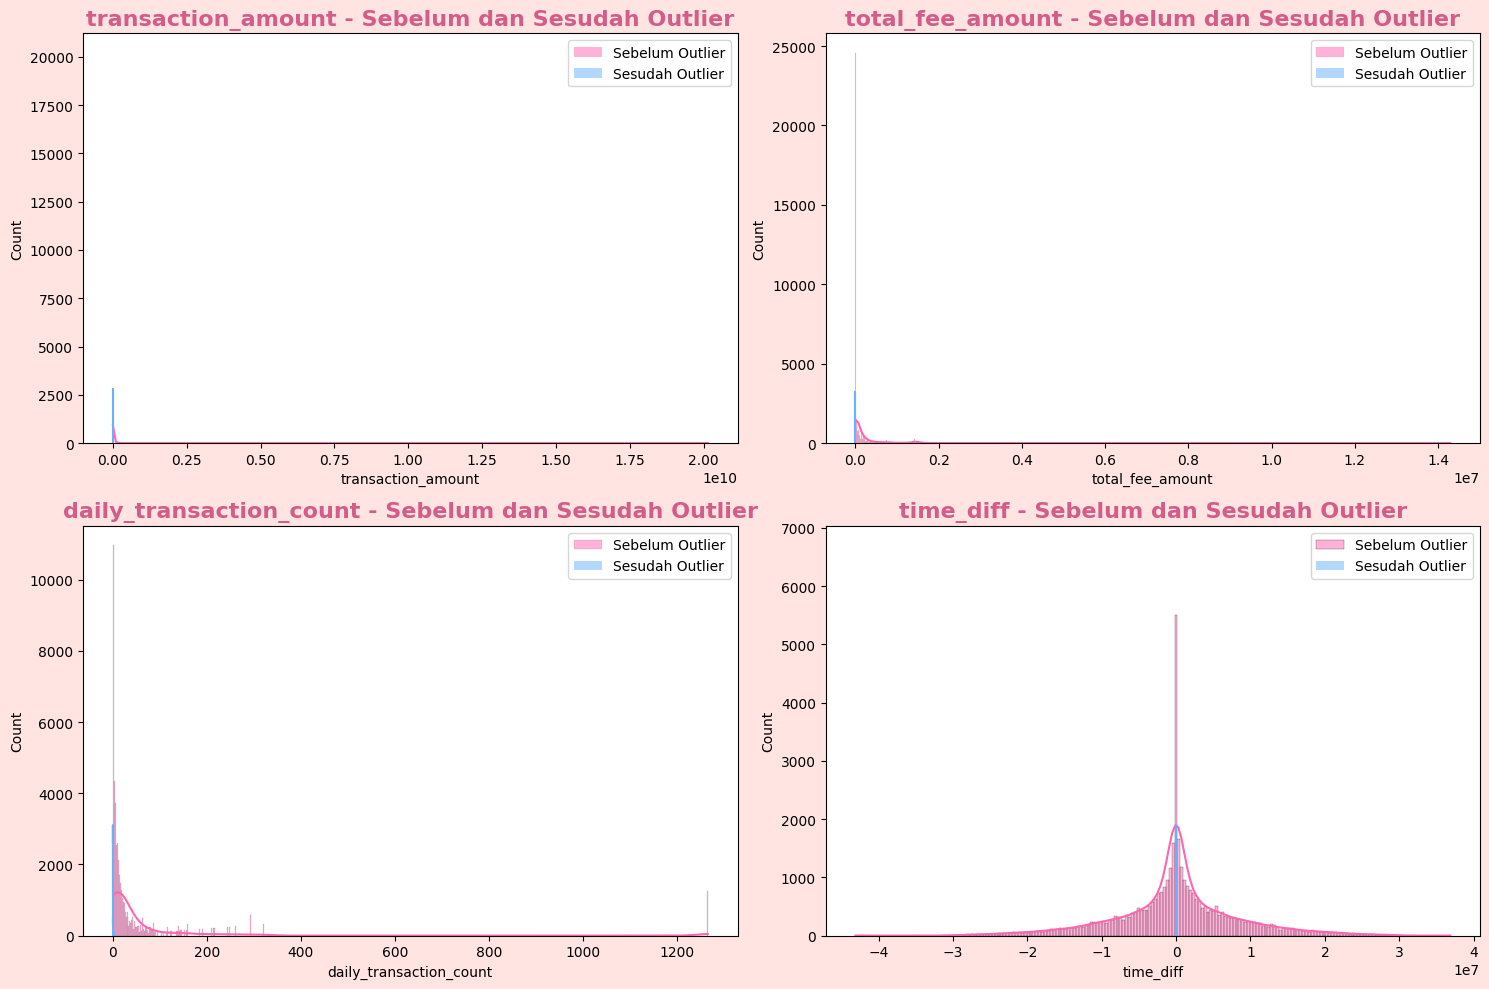

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset yang belum diproses dan yang sudah diproses
tr_original = pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv')

# Menyaring kolom yang ingin diproses
columns_to_visualize = ['transaction_amount', 'total_fee_amount', 'daily_transaction_count', 'time_diff']

# Membuat figur dan subplot untuk Visualisasi 1 (Before and After Outlier Treatment)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sebelum dan sesudah outlier ditangani
for i, col in enumerate(columns_to_visualize):
    axes[i//2, i%2].set_title(f'{col} - Sebelum dan Sesudah Outlier', fontsize=16, color='#D35C88', weight='bold')
    sns.histplot(tr_original[col], kde=True, label='Sebelum Outlier', color='#FF66B2', edgecolor='black', ax=axes[i//2, i%2])
    sns.histplot(tr[col], kde=True, label='Sesudah Outlier', color='#66B2FF', edgecolor='black', ax=axes[i//2, i%2])
    axes[i//2, i%2].legend()

    plt.gcf().set_facecolor('mistyrose')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Membaca dataset yang sudah diubah (outlier diganti dengan rata-rata)
tr = pd.read_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/outlier.csv')

# 2. Menyaring kolom yang ingin dinormalisasi (sama seperti yang diproses untuk outlier)
columns_to_normalize = ['transaction_amount', 'total_fee_amount', 'daily_transaction_count', 'time_diff']

# 3. Inisialisasi Min-Max Scaler
scaler = MinMaxScaler()

# 4. Normalisasi kolom-kolom yang dipilih
tr[columns_to_normalize] = scaler.fit_transform(tr[columns_to_normalize])

# 5. Menyimpan dataset yang sudah dinormalisasi ke file baru
output_file_normalized = '/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/normalisasi_transamount.csv'
tr.to_csv(output_file_normalized, index=False)

print(f"Data dengan kolom-kolom dinormalisasi telah disimpan di {output_file_normalized}")


Data dengan kolom-kolom dinormalisasi telah disimpan di /content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/normalisasi_transamount.csv


In [ ]:
pd.read_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/normalisasi_transamount.csv')

,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime,total_fee_amount,document_type_name,promotion_code,promotion_name,transaction_promo_cashback_amount,daily_transaction_count,transaction_count_fraud,time_diff,frequency_fraud,promotion_fraud_label
0,befdc59cf11ec39defab73c7baa0bd1c16ea7e003b59af...,unknown,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,0.000327,QRIS,QRIS,2023-12-27 08:47:56.463138,2023-12-27 08:48:03.576944,0.000283,PAY-IN,unknown,unknown,0.0,0.003125,False,NaN,non-fraud,unknown
1,2bc105494f6030d5194fc6fdc50d9acede7d122dd80b3a...,unknown,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...,0.000490,QRIS,QRIS,2023-12-28 11:30:42.785083,2023-12-28 11:30:49.305502,0.000424,PAY-IN,unknown,unknown,0.0,0.003125,False,0.002231,non-fraud,unknown
2,d8c359cc9de4f730939cfa6c5b50bac2215cf994a30816...,unknown,001046b5061e28476b83fe2335b04d3210bed72a2fee17...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0.649353,BANK_TRANSFER,BCA_MANUAL,2023-08-13 11:50:37.122442,2023-08-13 13:04:54.522228,0.000000,PAY-OUT,unknown,unknown,0.0,0.003125,False,NaN,non-fraud,unknown
3,769c7fdcc0e36175c9363c6d822ebb5b9c8748acb8c12e...,unknown,001046b5061e28476b83fe2335b04d3210bed72a2fee17...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0.974026,BANK_TRANSFER,BRI,2023-12-29 19:10:25.077279,2023-12-29 19:29:08.463497,0.000000,PAY-OUT,unknown,unknown,0.0,0.003125,False,0.277173,fraud,unknown
4,d808c4f7daf19127c77a79dffadf947d9a5d4fa4a9ecb7...,unknown,00119737eef11ff1d30c2061dd1e19c06d963d5a125c92...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0.065877,CREDIT_CARD,MASTERCARD,2023-05-05 10:12:38.083254,2023-05-31 09:19:27.323998,0.117101,PAY-OUT,unknown,unknown,0.0,0.000000,False,NaN,non-fraud,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3220d105503b34c8a43da87b7ac5365923742d74e699ae...,unknown,fff5f7cf3deff1c2acad4533c4b845f8f2c0c05168f668...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0.032955,CREDIT_CARD,MASTERCARD,2023-11-27 13:27:35.604107,2023-11-27 13:30:18.395752,0.060569,PAY-OUT,unknown,unknown,0.0,0.000000,False,NaN,non-fraud,unknown
49996,0785c548ad9260f4c65b37836520e3781c9fd1cd441431...,unknown,fff77b856ac2478f8911b9cddf65980ac7fdc4d700e354...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0.009178,CREDIT_CARD,VISA,2023-11-30 18:00:45.414410,2023-11-30 18:01:40.457680,0.016869,PAY-OUT,unknown,unknown,0.0,0.000000,False,NaN,non-fraud,unknown
49997,7862efbfd8e68bd315332118e2c1dfb7e825ceb06819b0...,unknown,fff9528eb5496b60fd3e824c66154f2d2f06c27c172a4a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0.081169,CREDIT_CARD,VISA,2023-06-15 09:26:40.813787,2023-06-15 09:30:16.690531,0.146376,PAY-OUT,unknown,unknown,0.0,0.003125,False,NaN,non-fraud,unknown
49998,af0c97c859e45bcc17205bc081a7cfaa73c19a31369e22...,unknown,fff9528eb5496b60fd3e824c66154f2d2f06c27c172a4a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0.164361,CREDIT_CARD,VISA,2023-07-15 15:02:32.964113,2023-07-15 15:04:35.161640,0.302090,PAY-OUT,unknown,unknown,0.0,0.003125,False,0.060589,fraud,unknown


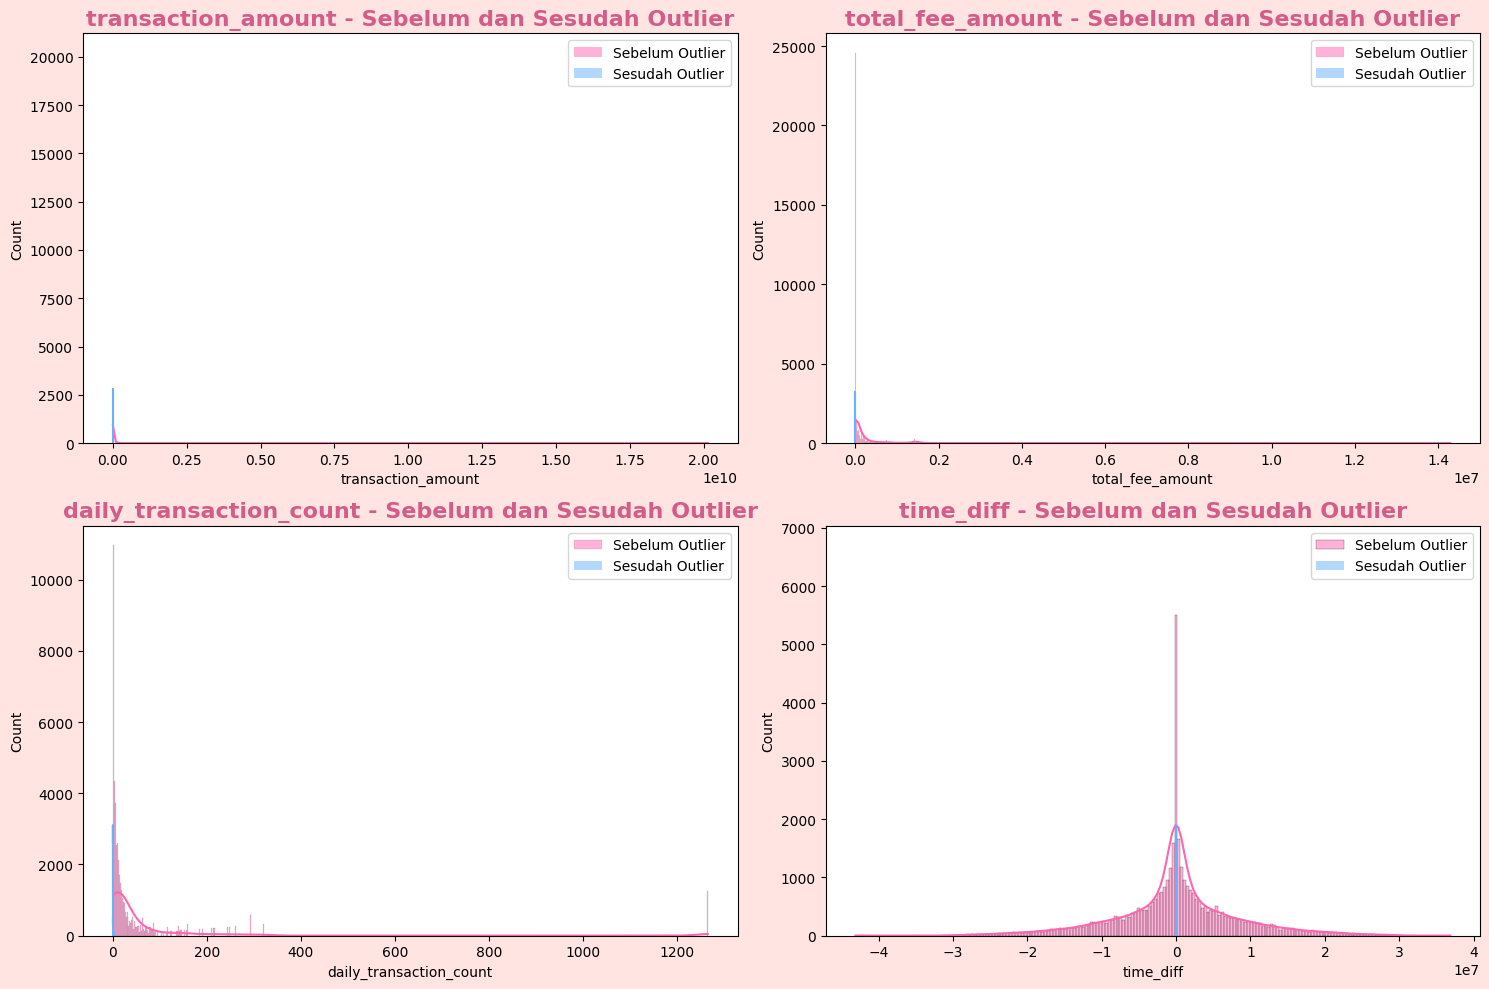

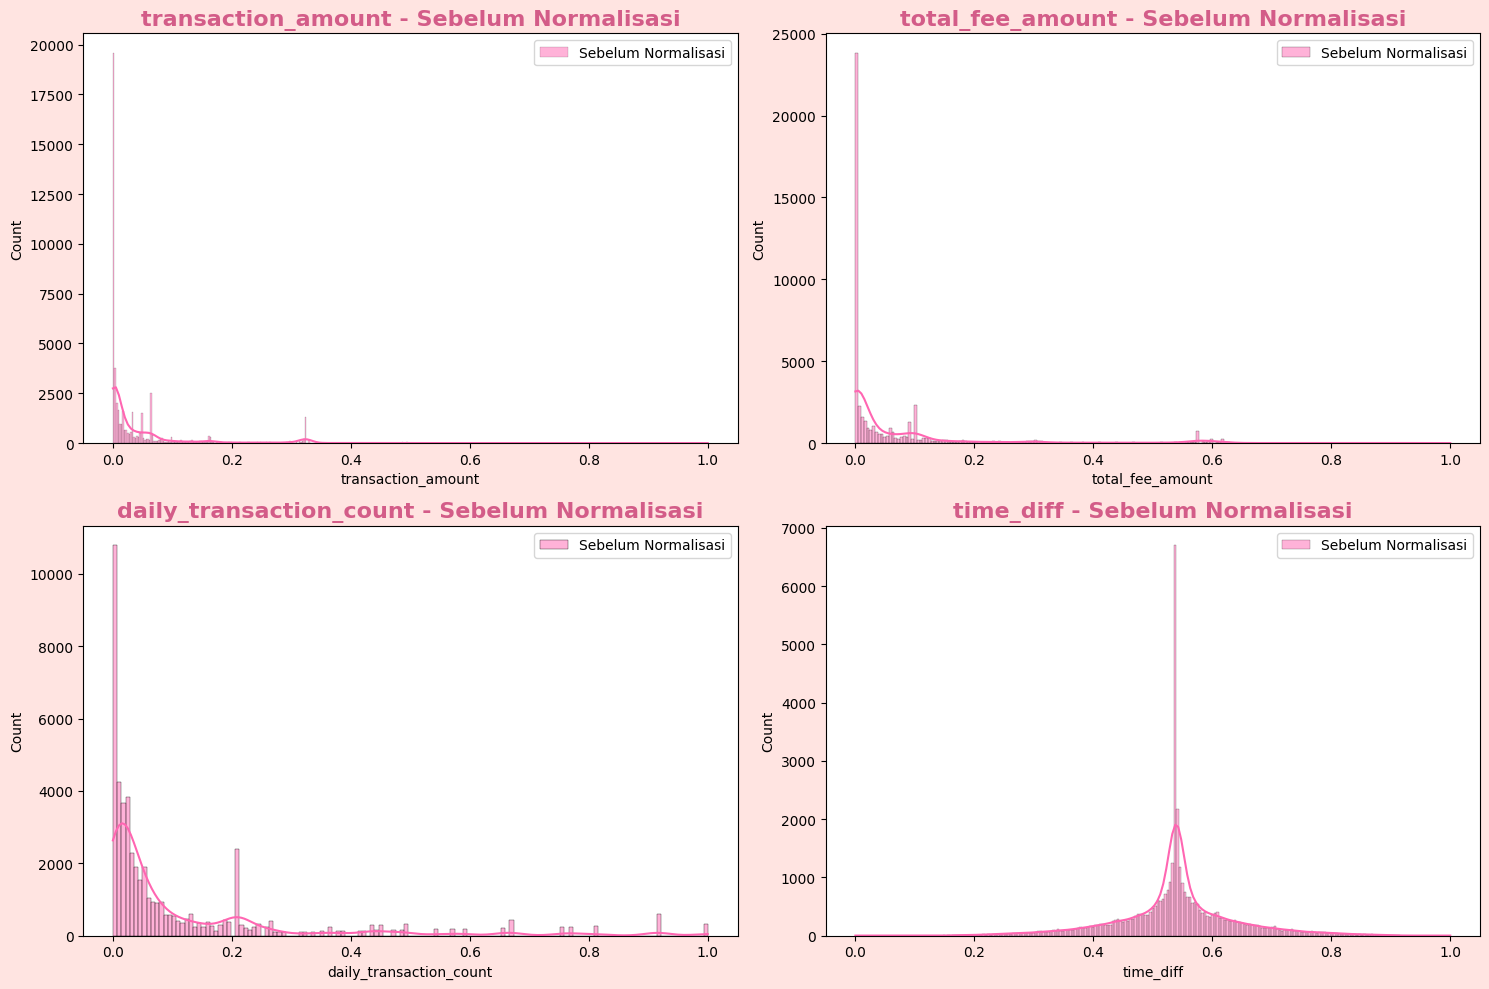

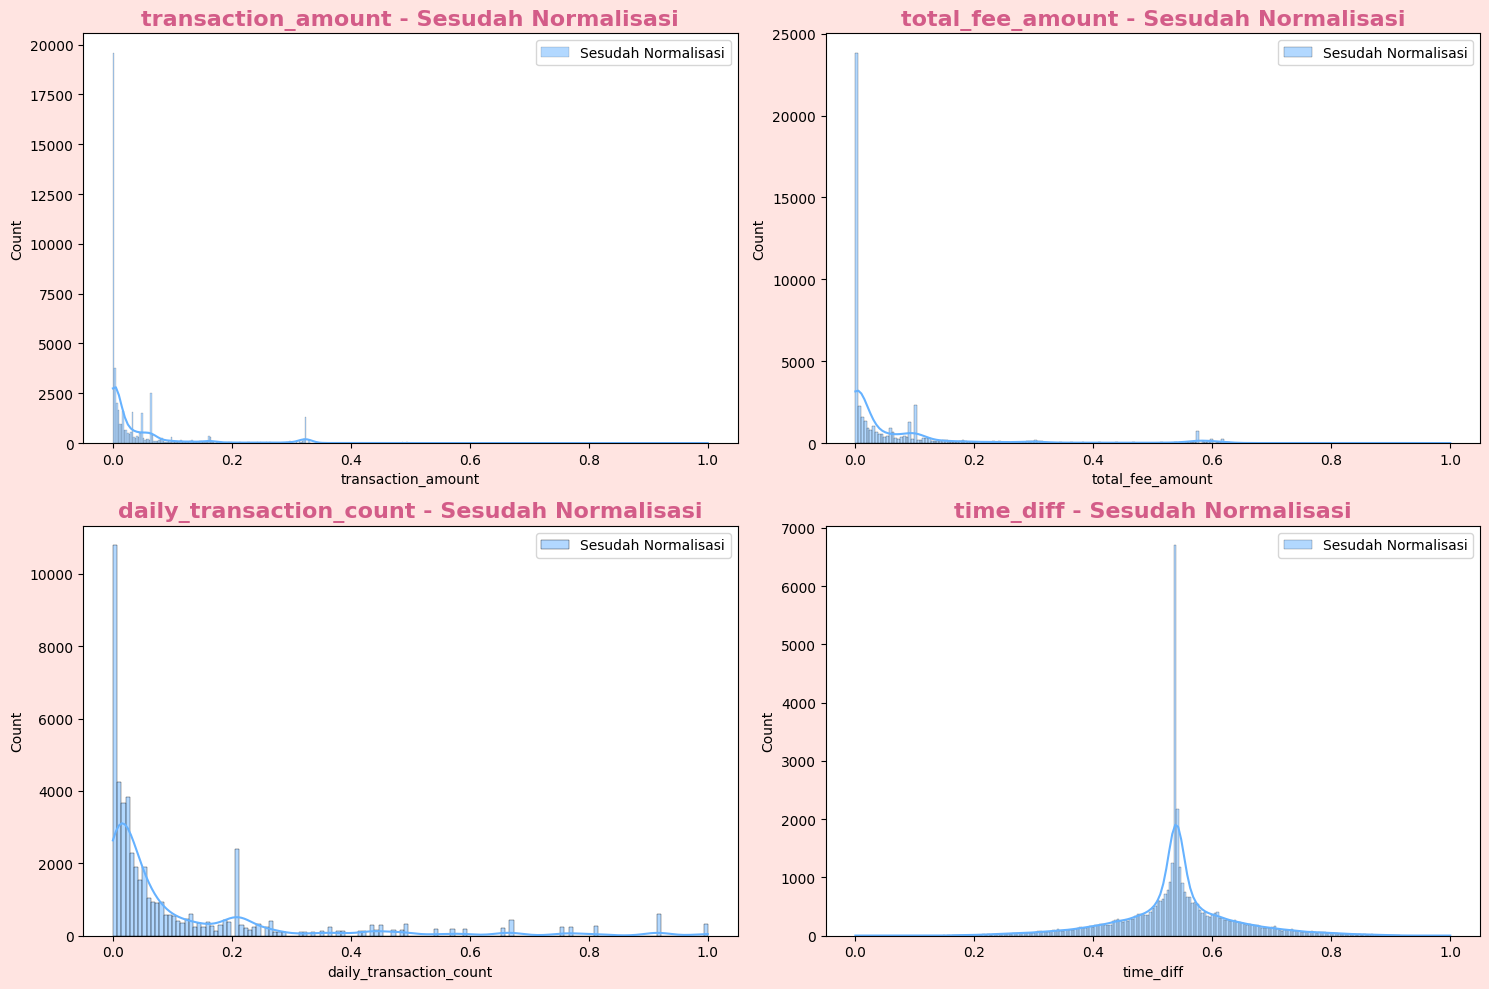

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Membaca dataset yang belum diproses dan yang sudah diproses
tr_original = pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv')

# Menyaring kolom yang ingin diproses
columns_to_visualize = ['transaction_amount', 'total_fee_amount', 'daily_transaction_count', 'time_diff']

# Membaca dataset yang sudah ditangani outlier
tr = pd.read_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/outlier.csv')

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
tr_normalized = tr.copy()
tr_normalized[columns_to_visualize] = scaler.fit_transform(tr[columns_to_visualize])

# Visualisasi Sebelum dan Sesudah Outlier
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(columns_to_visualize):
    axes[i//2, i%2].set_title(f'{col} - Sebelum dan Sesudah Outlier', fontsize=16, color='#D35C88', weight='bold')
    sns.histplot(tr_original[col], kde=True, label='Sebelum Outlier', color='#FF66B2', edgecolor='black', ax=axes[i//2, i%2])
    sns.histplot(tr[col], kde=True, label='Sesudah Outlier', color='#66B2FF', edgecolor='black', ax=axes[i//2, i%2])
    axes[i//2, i%2].legend()

plt.gcf().set_facecolor('mistyrose')
plt.tight_layout()

# Visualisasi Sebelum Normalisasi
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(columns_to_visualize):
    axes2[i//2, i%2].set_title(f'{col} - Sebelum Normalisasi', fontsize=16, color='#D35C88', weight='bold')
    sns.histplot(tr[col], kde=True, label='Sebelum Normalisasi', color='#FF66B2', edgecolor='black', ax=axes2[i//2, i%2])
    axes2[i//2, i%2].legend()

plt.gcf().set_facecolor('mistyrose')
plt.tight_layout()

# Visualisasi Sesudah Normalisasi
fig3, axes3 = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(columns_to_visualize):
    axes3[i//2, i%2].set_title(f'{col} - Sesudah Normalisasi', fontsize=16, color='#D35C88', weight='bold')
    sns.histplot(tr_normalized[col], kde=True, label='Sesudah Normalisasi', color='#66B2FF', edgecolor='black', ax=axes3[i//2, i%2])
    axes3[i//2, i%2].legend()

plt.gcf().set_facecolor('mistyrose')
plt.tight_layout()
plt.show()


In [ ]:
print(df.columns)

Index(['dpt_id', 'dpt_promotion_id', 'buyer_id', 'seller_id',
       'company_kyc_status_name', 'transaction_amount', 'payment_method_name',
       'payment_provider_name', 'transaction_created_datetime',
       'transaction_updated_datetime', 'total_fee_amount',
       'document_type_name', 'promotion_code', 'promotion_name',
       'transaction_promo_cashback_amount', 'daily_transaction_count',
       'transaction_count_fraud', 'time_diff', 'frequency_fraud',
       'promotion_fraud_label', 'log_transaction_amount'],
      dtype='object')


##**EDA**

###**Distribusi transaksi harian**

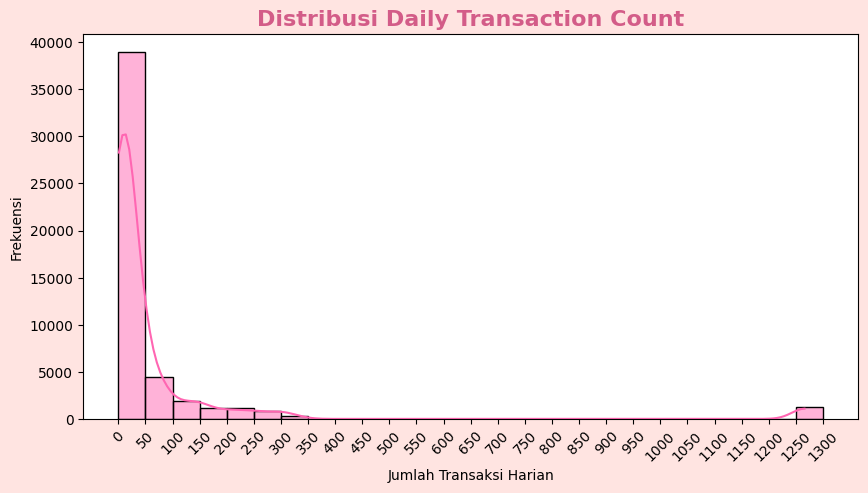

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Memuat dataset dari file CSV
df = pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv')

# Menentukan nilai min dan max dari daily_transaction_count
min_value = df['daily_transaction_count'].min()
max_value = df['daily_transaction_count'].max()

# Membuat bin edges secara manual
bin_edges = np.arange(0, max_value + 50, 50)  # Mulai dari 0, hingga max_value, dengan interval 50

# Membuat histogram dengan bin yang telah dihitung
plt.figure(figsize=(10,5))
sns.histplot(df['daily_transaction_count'], bins=bin_edges, kde=True, color='#FF66B2', edgecolor='black')  # kde=True untuk menambahkan kurva distribusi
plt.title('Distribusi Daily Transaction Count',fontsize=16, color='#D35C88', weight='bold')
plt.xlabel('Jumlah Transaksi Harian')
plt.ylabel('Frekuensi')

# Mengatur background menjadi soft pink
plt.gcf().set_facecolor('mistyrose')

# Mengatur sumbu x agar mencakup bin yang diinginkan
plt.xticks(bin_edges, rotation=45)

plt.show()


<ipython-input-28-146ded0d2e23>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fraud_pairs_sorted,


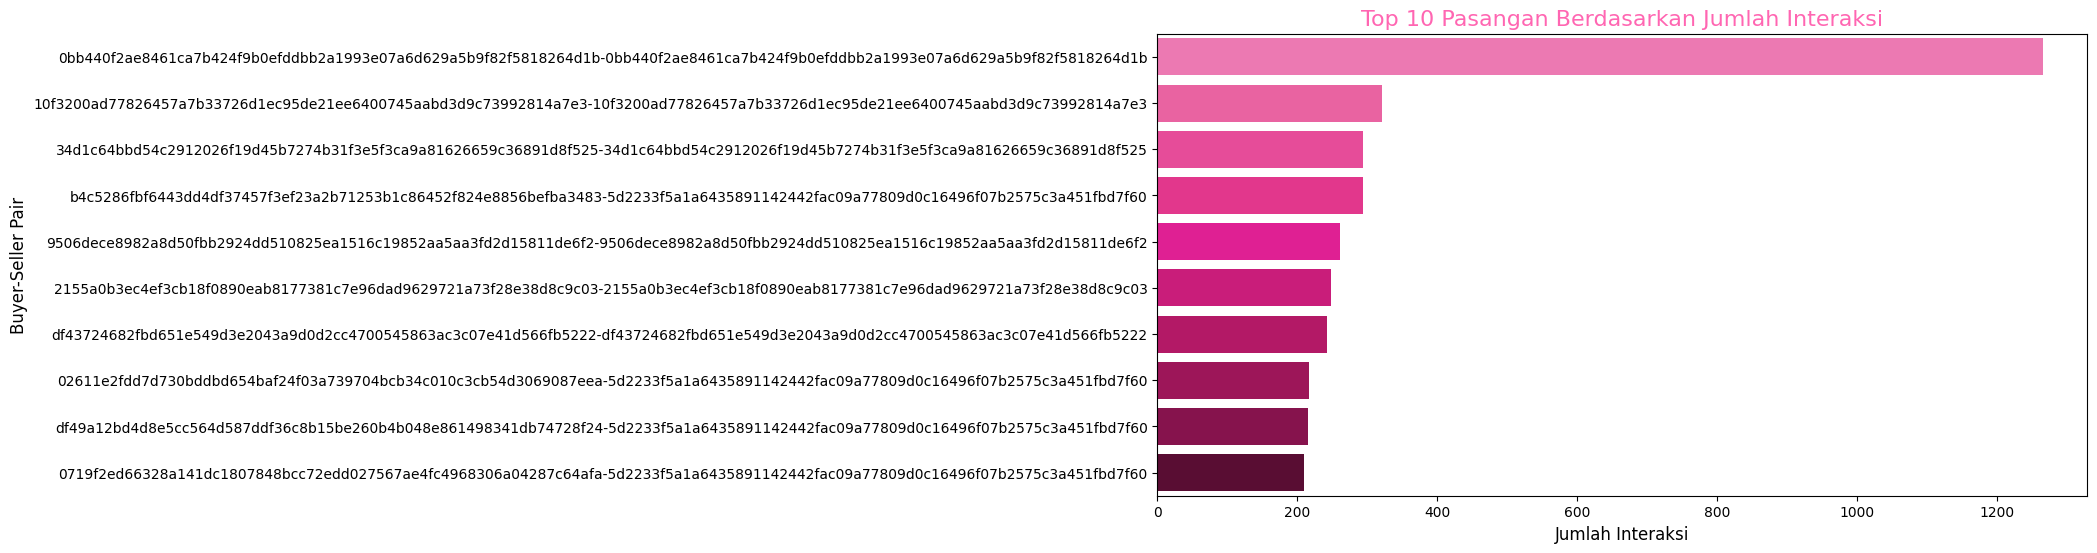

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Baca dataset
df = pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv')

# Hitung jumlah interaksi per pasangan buyer-seller
top_fraud_pairs = df.groupby(['buyer_id', 'seller_id']).size().reset_index(name='fraud_count')

# Urutkan berdasarkan jumlah interaksi tertinggi
top_fraud_pairs_sorted = top_fraud_pairs.sort_values(by='fraud_count', ascending=False).head(10)

# Buat kolom pasangan Buyer-Seller untuk label
top_fraud_pairs_sorted['buyer_seller_pair'] = top_fraud_pairs_sorted.apply(
    lambda x: f"{x['buyer_id']}-{x['seller_id']}", axis=1)

# Menampilkan Dataframe
top_fraud_pairs_sorted

# Visualisasi Top 10 Pasangan Berdasarkan Jumlah Interaksi dengan palet warna pink
plt.figure(figsize=(12, 6))
sns.barplot(data=top_fraud_pairs_sorted,
            x='fraud_count',
            y='buyer_seller_pair',
            palette=["#ff66b2", "#ff4d9f", "#ff3399", "#ff1a8c", "#ff0099",
                     "#e6007d", "#cc0066", "#b30059", "#99004d", "#660033"])  # Gradient pink colors

# Penambahan judul dan label
plt.title('Top 10 Pasangan Berdasarkan Jumlah Interaksi', fontsize=16, color='#ff66b2')
plt.xlabel('Jumlah Interaksi', fontsize=12)
plt.ylabel('Buyer-Seller Pair', fontsize=12)

# Menampilkan plot
plt.show()


<ipython-input-2-34a192ea9003>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['transaction_created_datetime'] = pd.to_datetime(fraud_df['transaction_created_datetime'])
<ipython-input-2-34a192ea9003>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


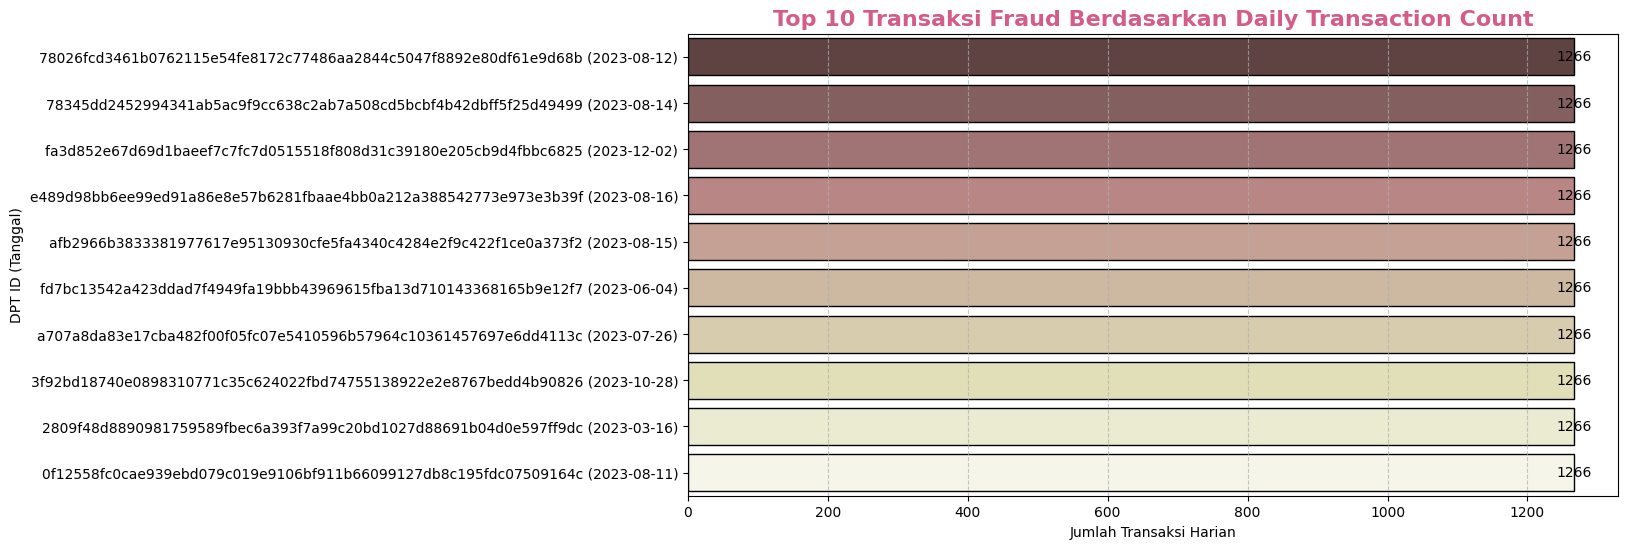

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Memuat dataset dari file CSV
df = pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv')

# Filter untuk transaksi yang diberi label fraud (kolom 'transaction_count_fraud' == 1)
fraud_df = df[df['transaction_count_fraud'] == 1]

# Mengonversi kolom datetime ke format datetime jika belum
fraud_df['transaction_created_datetime'] = pd.to_datetime(fraud_df['transaction_created_datetime'])

# Mendapatkan 10 transaksi dengan daily_transaction_count tertinggi yang memiliki label fraud
top_fraud_transactions = fraud_df.nlargest(10, 'daily_transaction_count')

# Menyusun data dengan menambahkan tanggal (atau waktu) ke label
top_fraud_transactions['dpt_id_date'] = top_fraud_transactions['dpt_id'].astype(str) + ' (' + top_fraud_transactions['transaction_created_datetime'].dt.date.astype(str) + ')'

# Visualisasi top 10 daily_transaction_count tertinggi dengan label fraud
plt.figure(figsize=(12, 6))
sns.barplot(
    x='daily_transaction_count',
    y='dpt_id_date',
    data=top_fraud_transactions,
    palette='pink',
    edgecolor='black'
)

# Menambahkan label untuk transaksi dengan jumlah tertinggi
for i, v in enumerate(top_fraud_transactions['daily_transaction_count']):
    plt.text(v + 1, i, str(v), color='black', ha='center', va='center')

plt.title('Top 10 Transaksi Fraud Berdasarkan Daily Transaction Count', fontsize=16, color='#D35C88', weight='bold')
plt.xlabel('Jumlah Transaksi Harian')
plt.ylabel('DPT ID (Tanggal)')

# Menambahkan grid pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


###**Distribusi transaction amount**

In [ ]:
import pandas as pd

# Memuat dataset dari file CSV
df = pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv')

# Menghitung nilai minimum dan maksimum dari transaction_amount
min_transaction_amount = df['transaction_amount'].min()
max_transaction_amount = df['transaction_amount'].max()

# Menampilkan hasil
print(f'Nilai Minimum dari Transaction Amount: {min_transaction_amount}')
print(f'Nilai Maximum dari Transaction Amount: {max_transaction_amount}')


Nilai Minimum dari Transaction Amount: 0.0
Nilai Maximum dari Transaction Amount: 20140103214.0


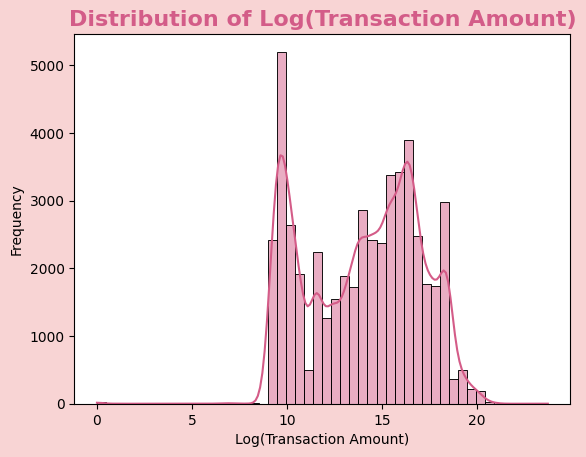

In [ ]:
# Menambahkan kolom baru dengan log dari transaction_amount
df['transaction_amount'] = np.log1p(df['transaction_amount'])

# Visualisasi menggunakan data yang sudah ditransformasi
plt.gcf().set_facecolor('#F8D4D4')
sns.histplot(df['transaction_amount'], bins=50, kde=True, color='#D45C88', edgecolor='black')
plt.title('Distribution of Log(Transaction Amount)',fontsize=16, color='#D35C88', weight='bold')
plt.xlabel('Log(Transaction Amount)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-52-2ffc0aa8e3cc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frozen_accounts['log_transaction_amount'] = np.log1p(frozen_accounts['transaction_amount'])


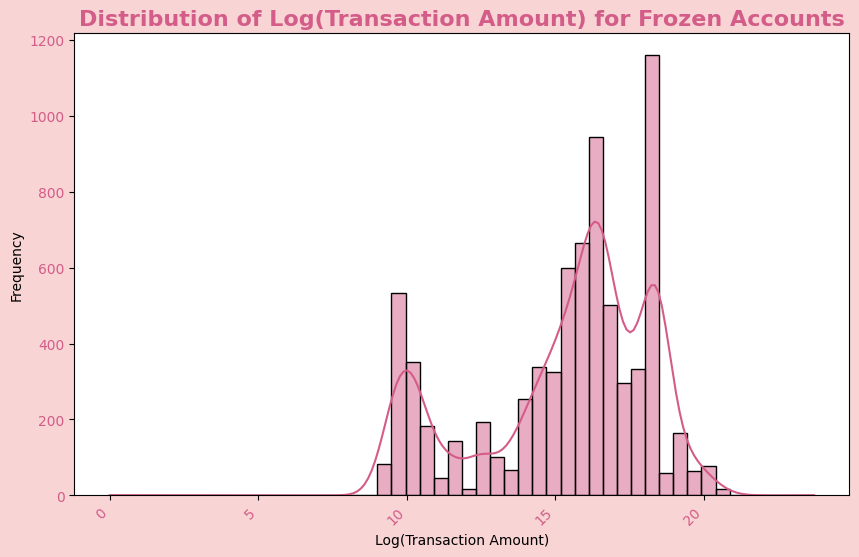

Anomalous Transactions on Frozen Accounts:
                                                  dpt_id  transaction_amount  \
14696  55d0686ca80c09320e0562835149d9b826a280235ff540...        9.992825e+08   
14708  87e4af9a25b9da404ba519c59011178c69761f2b2bf1f3...        9.999926e+08   
14709  bef052cf0611c919a3e399c25900a5a182d3c30c7dd4a5...        9.999926e+08   
25079  475dd26625fef097eabf190dd899dba028ac66aeecaf3e...        9.982883e+08   
37340  5feef00f722cd508125e890b36184aaaf9deb6b0ac0b41...        9.999926e+08   
43367  f620ec3ab2a4092ec1ea1d0913f0cc8b99d5ac448d77ee...        2.014010e+10   
48099  deef901f5127b079e1b5c826a5515c1c7f903760a431b8...        9.999926e+08   
48100  5459306239d4423fdd42641cfed7ec4baf52351dfa9b52...        9.999926e+08   
48102  19280a24e554353b85a936293acfc4e54a03ac7bd5900d...        9.130500e+08   
48103  1c99e907309808670dd78919da1042bd0aba3783786663...        9.130500e+08   
48531  5c2bd90b328a28fc87fcabb1252a754d84bc466bfe564c...        9.857000e+08 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data dengan kolom status KYC
frozen_accounts = df[df['company_kyc_status_name'] == 'AKUN_DIBEKUKAN']

# Log-transform transaction amount
frozen_accounts['log_transaction_amount'] = np.log1p(frozen_accounts['transaction_amount'])

# Visualisasi distribusi transaksi (untuk AKUN_DIBEKUKAN)

plt.figure(figsize=(10, 6))
sns.histplot(frozen_accounts['log_transaction_amount'], bins=50, kde=True, color='#D45C88', edgecolor='black')
plt.title('Distribution of Log(Transaction Amount) for Frozen Accounts', fontsize=16, color='#D35C88', weight='bold')
plt.xlabel('Log(Transaction Amount)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#D35C88')
plt.yticks(fontsize=10, color='#D35C88')
plt.gcf().set_facecolor('#F8D4D4')

plt.show()


# Identifikasi transaksi besar pada AKUN_DIBEKUKAN
anomalous_transactions = frozen_accounts[frozen_accounts['transaction_amount'] > 900_000_000]
print("Anomalous Transactions on Frozen Accounts:")
print(anomalous_transactions[['dpt_id', 'transaction_amount', 'company_kyc_status_name']])


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# 1. Impor Dataset Asli
data = pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv')

# 2. Hitung log(Transaction Amount)
data['log_transaction_amount'] = np.log(data['transaction_amount'] + 1)  # Tambah 1 untuk menghindari log(0)

# 3. Estimasi density distribution menggunakan Gaussian KDE
kde = gaussian_kde(data['log_transaction_amount'])
density_values = kde(data['log_transaction_amount'])

# 4. Tentukan Threshold untuk "jauh di atas atau di bawah density"
# Threshold untuk fraud: density di bawah persentil 5% atau di atas persentil 95%
lower_threshold = np.percentile(density_values, 5)  # Batas bawah
upper_threshold = np.percentile(density_values, 95)  # Batas atas

# 5. Label Fraud (1) atau Non-Fraud (0)
def label_fraud(row, lower_threshold, upper_threshold):
    density = kde.evaluate([row['log_transaction_amount']])[0]  # Hitung density dari nilai log transaksi
    if density < lower_threshold or density > upper_threshold:
        return 1  # Fraud
    else:
        return 0  # Non-Fraud

# Terapkan fungsi untuk menambah kolom 'fraud_label'
data['fraud_label'] = data.apply(label_fraud, axis=1, args=(lower_threshold, upper_threshold))

# 6. Simpan ke file CSV (perbaikan variabel result)
result = data[['buyer_id', 'seller_id', 'transaction_amount', 'fraud_label']]  # Pilih kolom yang relevan
result.to_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/labeled_transactions.csvv', index=False)

# 7. Baca kembali file CSV untuk verifikasi
pd.read_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/labeled_transactions.csv')



,buyer_id,seller_id,transaction_amount,fraud_label
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20380.0,0
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,14673.6,0
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1012500.0,0
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,30000.0,0
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1000008.0,0
...,...,...,...,...
49995,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,1000000.0,0
49996,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,50039500.0,0
49997,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,4531500.0,0
49998,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,8424500.0,0


Visualisasi ini relevan karena menunjukkan pola distribusi time difference yang memungkinkan Anda untuk memvalidasi aturan yang telah ditetapkan. Lonjakan aktivitas transaksi fraud dalam waktu singkat atau jeda yang sangat panjang dapat dianalisis lebih lanjut dari grafik ini.

##**Distribusi Penggunaan Cashback pada Promotion**

<ipython-input-14-431dd3530117>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='promotion_fraud_label', y='transaction_promo_cashback_amount', data=df_cleaned, palette=['#FF66B2'])  # Palet warna pink
<ipython-input-14-431dd3530117>:20: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='promotion_fraud_label', y='transaction_promo_cashback_amount', data=df_cleaned, palette=['#FF66B2'])  # Palet warna pink


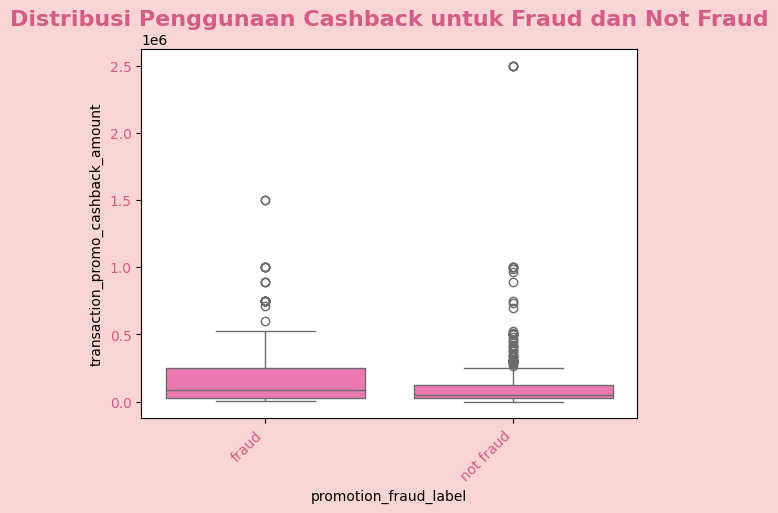

Pasangan Buyer-Seller dengan Total Cashback Amount Tertinggi (Kemungkinan Fraud):
                                              buyer_id  \
195  c799c01d50a17e52ffa074b3a6bad0f50781c6daad7d38...   
5    062af1aa1fd44f0ed383e660a1f38bff5403aab5bc2a6c...   
249  f970046aa33ac7d509b3cf1f8935f604bf239d62148b5b...   
215  e341588d56050e886925add56bd25c1413ec09613d2b5a...   
55   3ee6d95a04e635c25d300fc88d9c2abce0b86382aacbc0...   
75   4f976b97e829d0bf55d724c03b49a750318a4b0532bfdd...   
117  80213590c9f5204b6d39fca404ff542c37c69fd2804486...   
114  7d116bab2279ccf3acb2edbff754b729bd2bb17ab1e613...   
23   18079729082432704bc6ebb8d7f3ac09ca6da9690d60d5...   
49   39f2037996f6cd1910ab274530835a9a87ba0074e5ed1c...   

                                             seller_id  total_cashback_amount  
195  5d2233f5a1a6435891142442fac09a77809d0c16496f07...            2451008.052  
5    5d2233f5a1a6435891142442fac09a77809d0c16496f07...            1500000.000  
249  5d2233f5a1a6435891142442fac09a7780

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Membaca dataset
df = pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv')

# Menghapus baris yang memiliki nilai yang hilang pada kolom yang digunakan untuk analisis
df_cleaned = df.dropna(subset=['transaction_promo_cashback_amount', 'promotion_fraud_label'])

# Menghapus baris yang memiliki label 'unknown' pada kolom yang digunakan untuk analisis
df_cleaned = df_cleaned[df_cleaned['promotion_fraud_label'] != 'unknown']

# Filter data untuk fraud dan not fraud
df_fraud = df_cleaned[df_cleaned['promotion_fraud_label'] == 'fraud']
df_not_fraud = df_cleaned[df_cleaned['promotion_fraud_label'] == 'not fraud']

# Plot distribusi jumlah transaksi berdasarkan label
plt.gcf().set_facecolor('#F8D4D4')  # Background soft pink
sns.boxplot(x='promotion_fraud_label', y='transaction_promo_cashback_amount', data=df_cleaned, palette=['#FF66B2'])  # Palet warna pink
plt.title('Distribusi Penggunaan Cashback untuk Fraud dan Not Fraud', fontsize=16, color='#D35C88', weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#D35C88')
plt.yticks(fontsize=10, color='#D35C88')

plt.show()

# Mengelompokkan data berdasarkan pasangan buyer-seller untuk transaksi fraud
fraud_pairs = df_fraud.groupby(['buyer_id', 'seller_id']).agg(
    total_cashback_amount=('transaction_promo_cashback_amount', 'sum')
).reset_index()

# Mengurutkan pasangan berdasarkan total cashback amount tertinggi
fraud_pairs_sorted = fraud_pairs.sort_values(by='total_cashback_amount', ascending=False)

# Menampilkan pasangan buyer-seller dengan total cashback amount tertinggi
print("Pasangan Buyer-Seller dengan Total Cashback Amount Tertinggi (Kemungkinan Fraud):")
print(fraud_pairs_sorted.head(10))


Transaksi fraud cenderung melibatkan cashback promo yang lebih besar dibandingkan transaksi yang bukan fraud, sehingga mungkin ada potensi penyalahgunaan promo cashback sebagai pola dalam penipuan.

Hubungan promotion_fraud_label dengan transaction_amount
Fraudulent Users (Fraud):

Pengguna dengan label fraud memanfaatkan cashback tanpa id promosi yang valid.
Ini dapat berarti bahwa jumlah transaksi pengguna fraud tidak selalu tinggi, karena tujuan mereka mungkin lebih fokus pada eksploitasi promosi tertentu (bukan volume transaksi).
Pada boxplot, terlihat bahwa log jumlah transaksi pengguna fraud lebih rendah dibandingkan kategori lain. Ini mengindikasikan bahwa fraudsters lebih terfokus pada transaksi spesifik yang memberikan keuntungan cashback.
Non-Fraudulent Users (Not Fraud):

Pengguna ini memanfaatkan promosi secara wajar, sehingga mereka mungkin memiliki jumlah transaksi yang lebih stabil dan bervariasi.
Boxplot menunjukkan bahwa distribusi jumlah transaksi lebih tinggi dibandingkan pengguna fraud, karena pengguna ini benar-benar aktif bertransaksi tanpa niat eksploitasi.
Kategori Unknown:

Meskipun label ini kurang jelas, data menunjukkan variasi jumlah transaksi yang besar. Ini mungkin mencakup pengguna dengan perilaku tidak terklasifikasi (misalnya, pengguna yang jarang bertransaksi atau memiliki pola tak lazim, tetapi tidak memenuhi kriteria fraud).


###**memplot transaksi berdasarkan waktu per jam**

<ipython-input-25-02183eb1671c>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('H', on='transaction_created_datetime').sum()


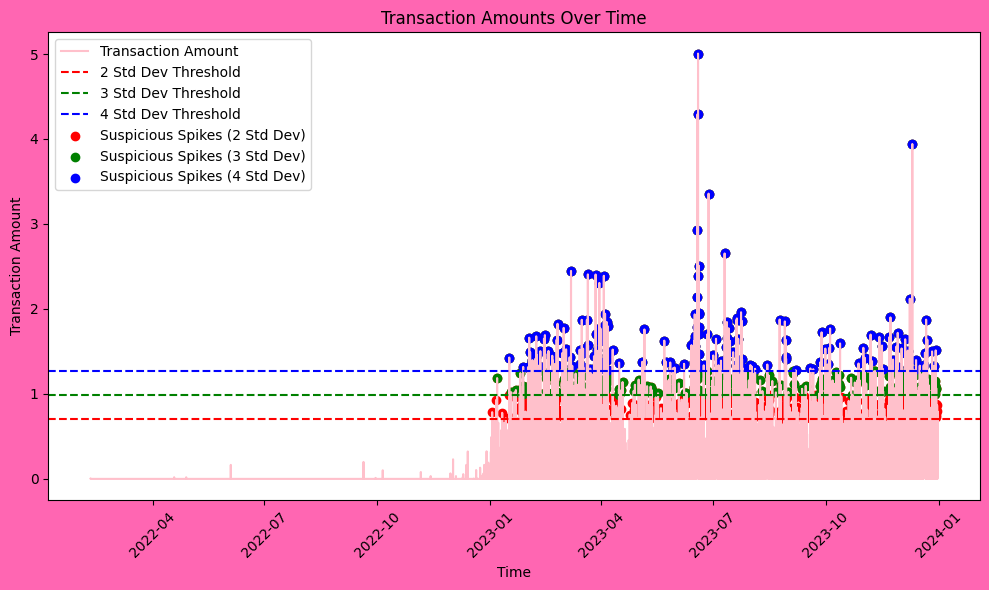

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset (ganti dengan path dataset yang sesuai)
df = pd.read_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/normalisasi_transamount.csv')

# Pastikan kolom 'transaction_created_datetime' dalam format datetime
df['transaction_created_datetime'] = pd.to_datetime(df['transaction_created_datetime'])

# Resample data berdasarkan waktu (misalnya per jam) untuk melihat pola transaksi
df_resampled = df.resample('H', on='transaction_created_datetime').sum()

# Plot transaksi per waktu
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['transaction_amount'], label='Transaction Amount', color='pink')

# Deteksi lonjakan mencurigakan dengan beberapa threshold
threshold_2sd = df_resampled['transaction_amount'].mean() + 2 * df_resampled['transaction_amount'].std()  # 2 Std Dev
threshold_3sd = df_resampled['transaction_amount'].mean() + 3 * df_resampled['transaction_amount'].std()  # 3 Std Dev
threshold_4sd = df_resampled['transaction_amount'].mean() + 4 * df_resampled['transaction_amount'].std()  # 4 Std Dev

# Menambahkan garis threshold
plt.axhline(y=threshold_2sd, color='r', linestyle='--', label='2 Std Dev Threshold')
plt.axhline(y=threshold_3sd, color='g', linestyle='--', label='3 Std Dev Threshold')
plt.axhline(y=threshold_4sd, color='b', linestyle='--', label='4 Std Dev Threshold')

# Menandai titik lonjakan untuk setiap threshold
suspicious_spikes_2sd = df_resampled[df_resampled['transaction_amount'] > threshold_2sd]
suspicious_spikes_3sd = df_resampled[df_resampled['transaction_amount'] > threshold_3sd]
suspicious_spikes_4sd = df_resampled[df_resampled['transaction_amount'] > threshold_4sd]

# Scatter plot untuk setiap threshold
plt.scatter(suspicious_spikes_2sd.index, suspicious_spikes_2sd['transaction_amount'], color='red', label='Suspicious Spikes (2 Std Dev)')
plt.scatter(suspicious_spikes_3sd.index, suspicious_spikes_3sd['transaction_amount'], color='green', label='Suspicious Spikes (3 Std Dev)')
plt.scatter(suspicious_spikes_4sd.index, suspicious_spikes_4sd['transaction_amount'], color='blue', label='Suspicious Spikes (4 Std Dev)')

# Menambahkan label dan judul
plt.title('Transaction Amounts Over Time')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.legend()
plt.gcf().set_facecolor('#FF66B2')

# Tampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-2-ad7cc0208012>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('H', on='transaction_created_datetime').sum()


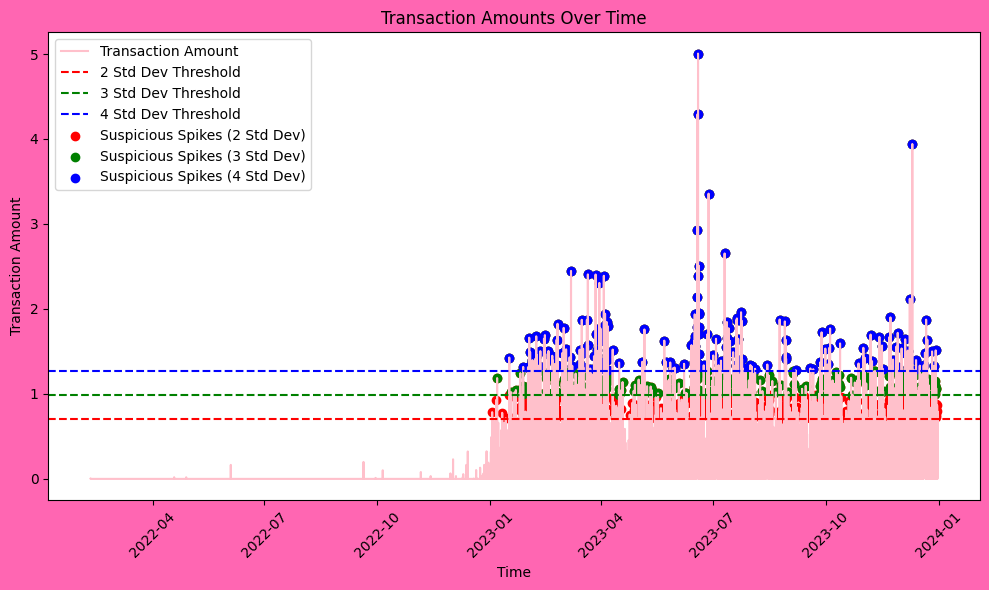

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset (ganti dengan path dataset yang sesuai)
df = pd.read_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/outlier.csv')

# Pastikan kolom 'transaction_created_datetime' dalam format datetime
df['transaction_created_datetime'] = pd.to_datetime(df['transaction_created_datetime'])

# Resample data berdasarkan waktu (misalnya per jam) untuk melihat pola transaksi
df_resampled = df.resample('H', on='transaction_created_datetime').sum()

# Plot transaksi per waktu
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['transaction_amount'], label='Transaction Amount', color='pink')

# Deteksi lonjakan mencurigakan dengan beberapa threshold
threshold_2sd = df_resampled['transaction_amount'].mean() + 2 * df_resampled['transaction_amount'].std()  # 2 Std Dev
threshold_3sd = df_resampled['transaction_amount'].mean() + 3 * df_resampled['transaction_amount'].std()  # 3 Std Dev
threshold_4sd = df_resampled['transaction_amount'].mean() + 4 * df_resampled['transaction_amount'].std()  # 4 Std Dev

# Menambahkan garis threshold
plt.axhline(y=threshold_2sd, color='r', linestyle='--', label='2 Std Dev Threshold')
plt.axhline(y=threshold_3sd, color='g', linestyle='--', label='3 Std Dev Threshold')
plt.axhline(y=threshold_4sd, color='b', linestyle='--', label='4 Std Dev Threshold')

# Menandai titik lonjakan untuk setiap threshold
suspicious_spikes_2sd = df_resampled[df_resampled['transaction_amount'] > threshold_2sd]
suspicious_spikes_3sd = df_resampled[df_resampled['transaction_amount'] > threshold_3sd]
suspicious_spikes_4sd = df_resampled[df_resampled['transaction_amount'] > threshold_4sd]

# Scatter plot untuk setiap threshold
plt.scatter(suspicious_spikes_2sd.index, suspicious_spikes_2sd['transaction_amount'], color='red', label='Suspicious Spikes (2 Std Dev)')
plt.scatter(suspicious_spikes_3sd.index, suspicious_spikes_3sd['transaction_amount'], color='green', label='Suspicious Spikes (3 Std Dev)')
plt.scatter(suspicious_spikes_4sd.index, suspicious_spikes_4sd['transaction_amount'], color='blue', label='Suspicious Spikes (4 Std Dev)')

# Menambahkan label dan judul
plt.title('Transaction Amounts Over Time')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.legend()
plt.gcf().set_facecolor('#FF66B2')

# Tampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Membaca dataset utama
df = pd.read_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/normalisasi_transamount.csv')

# Membaca file referensi untuk mendapatkan urutan buyer_id dan seller_id yang benar
df_reference = pd.read_csv('/content/drive/MyDrive/cleaned_merged3.csv')

# Pastikan kolom 'transaction_created_datetime' dalam format datetime
df['transaction_created_datetime'] = pd.to_datetime(df['transaction_created_datetime'])

# Hitung threshold 4 standar deviasi dari seluruh transaksi
threshold_4sd = df['transaction_amount'].mean() + 4 * df['transaction_amount'].std()  # 4 Std Dev

# Menandai transaksi yang melebihi threshold 4 standar deviasi
df['transaction_overtime_fraud'] = np.where(df['transaction_amount'] > threshold_4sd, 1, 0)

# Mengurutkan dataset df berdasarkan urutan buyer_id dan seller_id di df_reference
df_sorted = df.set_index(['buyer_id', 'seller_id']).loc[df_reference.set_index(['buyer_id', 'seller_id']).index].reset_index()

# Menyaring data untuk 49.999 baris pertama dan menampilkan 'buyer_id', 'seller_id', dan label fraud
output_df = df_sorted.head(49999)[['buyer_id', 'seller_id', 'transaction_overtime_fraud']]

# Menyimpan hasil ke file CSV baru
output_path = '/content/drive/MyDrive/transaction_overtime_fraud_label_with_buyers_sellers_sorted.csv'
output_df.to_csv(output_path, index=False)
pd.read_csv('/content/drive/MyDrive/transaction_overtime_fraud_label_with_buyers_sellers_sorted.csv')


,buyer_id,seller_id,transaction_overtime_fraud
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
1,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
2,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
3,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
4,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
...,...,...,...
49994,a388da6750af2dfcc1a4961040e09586d80835ae520b43...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
49995,a388da6750af2dfcc1a4961040e09586d80835ae520b43...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
49996,a388da6750af2dfcc1a4961040e09586d80835ae520b43...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
49997,a388da6750af2dfcc1a4961040e09586d80835ae520b43...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0


##**Graff Buyer Seller Network**

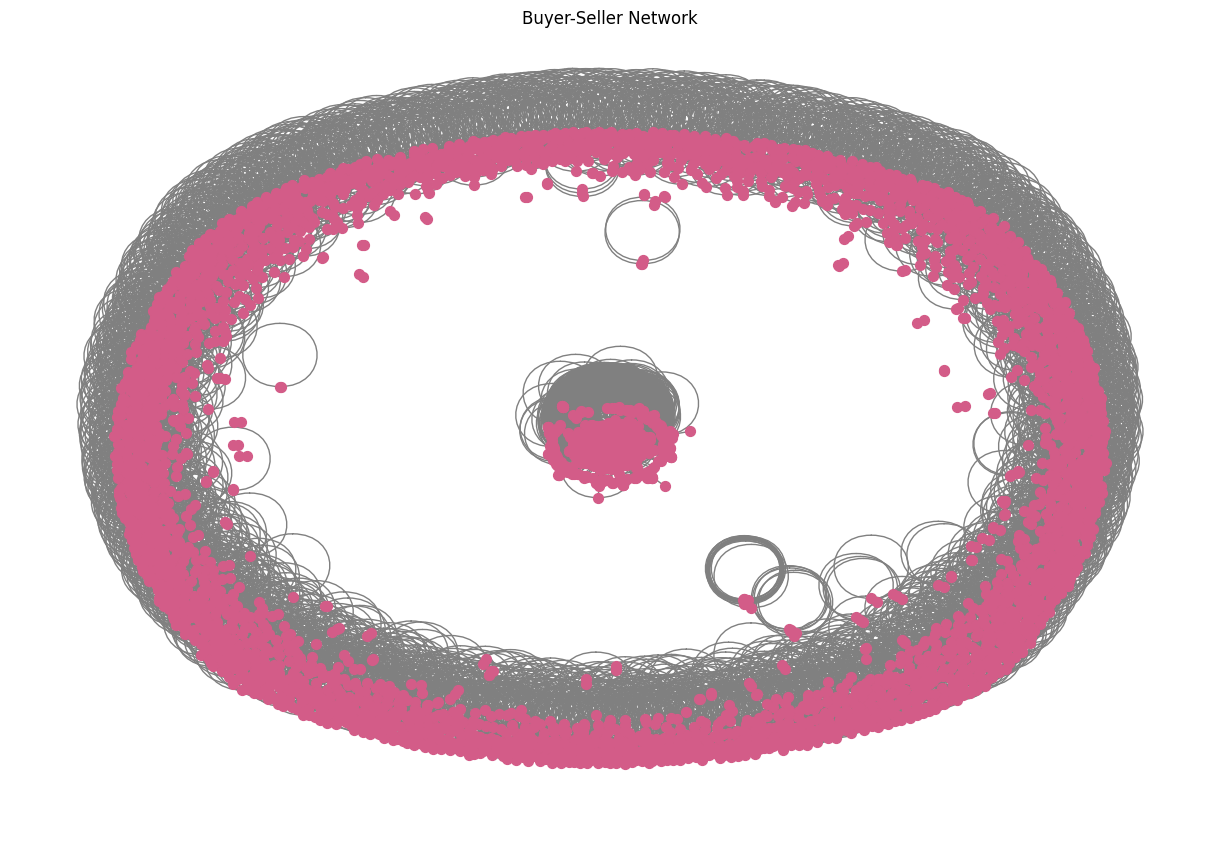

Suspicious nodes: ['5d2233f5a1a6435891142442fac09a77809d0c16496f07b2575c3a451fbd7f60', 'b4c5286fbf6443dd4df37457f3ef23a2b71253b1c86452f824e8856befba3483', '02611e2fdd7d730bddbd654baf24f03a739704bcb34c010c3cb54d3069087eea', '985cafd6d0d1c62748bbcfe8be780c09de7ce6b80a6d67a2f1fff7b3a2269b6e', '9203f5ebb08fee8355b03b0f7ebf4aa98cc3687a836cf45ca311fd8824522853', '6e0fe0280311be18ab37e2ac10675354464e6448e38e4e73f2def76020fe40f2', 'ed654f3687ca1ef5da46e0d2988c906c02a740fa1fb1bf68f0d3725ac35e2201', '93628e8e3030e3e1d4f0c4288991fac02621374a42631753f7dc46e3ded022e7', '50e77d9e9f3063dc30825b05047d3ef4e9a9e21ae4bc18be445a8a8230451bbc', 'cf436a102ec954a16e2b828b5e3936118ab200419f5a06b7b4cad133a2b12431', '0fe7c714dcccfbf4b9ed7a6d51bb7e0f1f23244d87e74bc1295818b022669cd5', '04ada8d5a21b3ee301e6841345139acf0be91492b6382b38f6350c685307cfac', '388dbd8594db84a0485ad0085b7b2cceef013e10ca3e728a3385ccebc2207c62']


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat graf menggunakan buyer_id dan seller_id
G = nx.from_pandas_edgelist(df, source='buyer_id', target='seller_id', edge_attr='transaction_amount')

# Visualisasi jaringan
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Tata letak graf
nx.draw(G, pos, node_size=50, node_color='#D35C88', edge_color='gray', with_labels=False)
plt.title('Buyer-Seller Network')
plt.show()

# Analisis deteksi hubungan mencurigakan (misal, derajat tinggi)
suspicious_nodes = [node for node, degree in G.degree() if degree > 5]
print(f"Suspicious nodes: {suspicious_nodes}")


In [ ]:
import pandas as pd
import networkx as nx

# Membaca dataset
df = pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv')

# Membuat graf menggunakan buyer_id dan seller_id
G = nx.from_pandas_edgelist(df, source='buyer_id', target='seller_id', edge_attr='transaction_amount')

# Menambahkan kolom 'graff_fraud' dengan nilai 0
df['graff_fraud'] = 0

# Labeling berdasarkan derajat
for node in G.nodes():
    if G.degree(node) > 5:  # Jika derajat lebih dari 5
        # Menandai pasangan buyer_id dan seller_id yang berhubungan dengan node tersebut sebagai fraud
        df.loc[(df['buyer_id'] == node) | (df['seller_id'] == node), 'graff_fraud'] = 1

# Menyimpan hanya kolom 'graff_fraud' ke file baru
output_path = '/content/drive/MyDrive/encoding_4.csv'
df[['graff_fraud']].to_csv(output_path, index=False)
pd.read_csv('/content/drive/MyDrive/encoding_4.csv')


,graff_fraud
0,1
1,1
2,1
3,0
4,0
...,...
49995,0
49996,1
49997,1
49998,1


##**Analisis Cohort Berdasarkan Temuan EDA**

##**overtime dalam fraud cohort analysis**

In [ ]:
fraud_cohort = df[df['frequency_fraud'] == 'fraud'].groupby(['cohort_month', 'transaction_created_datetime'])['buyer_id'].count().unstack(0)


<ipython-input-9-1c81ff2bd872>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data['transaction_created_datetime'] = pd.to_datetime(fraud_data['transaction_created_datetime'])
<ipython-input-9-1c81ff2bd872>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data['transaction_month'] = fraud_data['transaction_created_datetime'].dt.to_period('M')


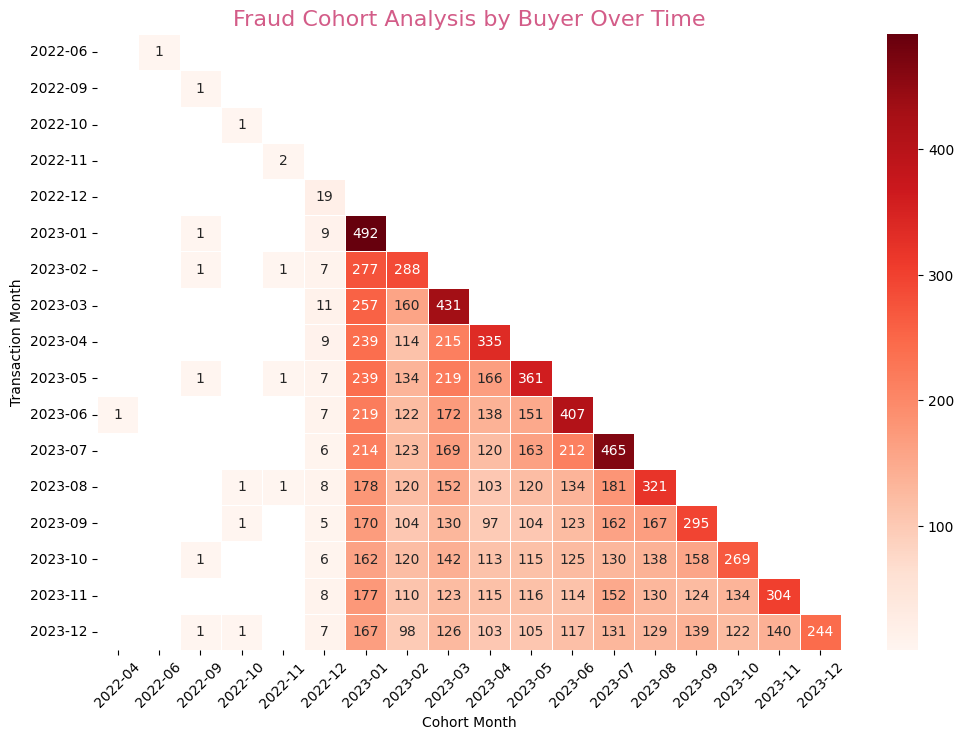

In [ ]:
# Filter fraud data
fraud_data = df[df['frequency_fraud'] == 'fraud']

# Resample berdasarkan minggu (atau bulan jika diperlukan)
fraud_data['transaction_created_datetime'] = pd.to_datetime(fraud_data['transaction_created_datetime'])
fraud_data['transaction_month'] = fraud_data['transaction_created_datetime'].dt.to_period('M')

# Menghitung jumlah fraud per cohort dan bulan
fraud_cohort = fraud_data.groupby(['cohort_month', 'transaction_month'])['buyer_id'].nunique().unstack(0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(fraud_cohort, annot=True, fmt='.0f', cmap='Reds', linewidths=0.5)
plt.title('Fraud Cohort Analysis by Buyer Over Time', fontsize=16, color='#D35C88')
plt.xlabel('Cohort Month')
plt.ylabel('Transaction Month')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv')

# Identifikasi pasangan buyer_id dan seller_id yang terlibat dalam pembelian unik
unique_pairs = df[['buyer_id', 'seller_id']].drop_duplicates()

# Labeli dengan 1 jika transaksi fraud terdeteksi, 0 jika tidak
unique_pairs['cohort_buyer'] = unique_pairs.apply(lambda row: 1 if (df[(df['buyer_id'] == row['buyer_id']) & (df['seller_id'] == row['seller_id'])]['frequency_fraud'] == 'fraud').any() else 0, axis=1)

# Simpan ke file CSV baru dengan hanya kolom cohort_buyer
unique_pairs[['buyer_id', 'seller_id', 'cohort_buyer']].to_csv('/content/drive/MyDrive/encoding_6.csv', index=False)
pd.read_csv('/content/drive/MyDrive/encoding_6.csv')



,buyer_id,seller_id,cohort_buyer
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,1
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1
...,...,...,...
10349,1bf267e94144034743bf8f8b013a1503a3cfd90e14b12e...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
10350,4773153c7e22d60933260b4f357504064c5a9e8ad7e22d...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
10351,43033f91de9577fbc76cbfaacafb4f983ababcaa8d9e42...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
10352,d9c529a1c0ec32904f16367d606a3218f4c6c4228f3892...,d9c529a1c0ec32904f16367d606a3218f4c6c4228f3892...,0


In [ ]:
import pandas as pd

# Load kedua file ke dalam DataFrame
file1_path = '/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv'
file2_path = '/content/drive/MyDrive/encoding_6.csv'

df_main = pd.read_csv(file1_path)
df_encoding = pd.read_csv(file2_path)

# Pastikan kolom-kolom kunci tersedia
print(df_main.columns)
print(df_encoding.columns)

# Merge berdasarkan pasangan buyer_id dan seller_id
merged_df = df_main.merge(
    df_encoding[['buyer_id', 'seller_id', 'cohort_buyer']],
    on=['buyer_id', 'seller_id'],
    how='left'
)

# Isi kolom 'promotional_overtime' dengan nilai dari hasil merge
df_main['cohort_buyer'] = merged_df['cohort_buyer']

# Jika ada nilai NaN, isi dengan default (opsional, misalnya 0)
df_main['cohort_buyer'] = df_main['cohort_buyer'].fillna(0)

# Simpan hasil ke file baru
output_path = '/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled_filled.csv'
df_main.to_csv(output_path, index=False)

pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled_filled.csv')


Index(['company_id', 'company_kyc_status_name', 'company_kyb_status_name',
       'company_type_group', 'company_phone_verified_flag',
       'company_email_verified_flag', 'user_fraud_flag',
       'testing_account_flag', 'blacklist_account_flag', 'package_active_name',
       'company_registered_datetime', 'dpt_promotion_id', 'promotion_code',
       'promotion_name', 'transaction_promo_cashback_amount', 'dpt_id',
       'total_fee_amount', 'document_type_name', 'dpt_id.1',
       'dpt_promotion_id.1', 'buyer_id', 'seller_id', 'transaction_amount',
       'payment_method_name', 'payment_provider_name',
       'transaction_created_datetime', 'transaction_updated_datetime',
       'daily_transaction_count', 'transaction_count_fraud', 'time_diff',
       'frequency_fraud', 'promotion_fraud_label'],
      dtype='object')
Index(['buyer_id', 'seller_id', 'cohort_buyer'], dtype='object')


,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,...,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime,daily_transaction_count,transaction_count_fraud,time_diff,frequency_fraud,promotion_fraud_label,cohort_buyer
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,...,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352,18,False,NaN,non-fraud,unknown,1
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184,13,False,NaN,non-fraud,unknown,1
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359,7,False,NaN,non-fraud,unknown,1
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,...,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121,11,False,NaN,non-fraud,unknown,1
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ THREE MONTHS,...,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498,7,False,NaN,non-fraud,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,FREE,...,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-06-19 13:52:12.117180,2023-06-19 13:53:09.785285,6,False,-5.707722e+06,fraud,unknown,1
49996,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,1.0,1.0,0.0,0.0,FREE,...,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA_CREDIT_CARD,2023-06-02 11:53:06.595470,2023-06-02 11:56:42.181481,9,False,-1.674449e+06,fraud,unknown,1
49997,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,VALIDASI_BERHASIL,BELUM_VALIDASI,PT,1.0,1.0,0.0,1.0,0.0,FREE,...,QRIS,QRIS,2023-10-23 14:06:05.090016,2023-10-23 14:06:05.090016,124,False,-5.329163e+06,fraud,unknown,1
49998,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,VALIDASI_BERHASIL,DOKUMEN_KURANG_LENGKAP,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ SIX MONTHS,...,CREDIT_CARD,MASTERCARD,2023-11-05 16:24:20.163636,2023-11-05 16:25:34.101821,16,False,2.031354e+07,fraud,unknown,1


In [ ]:
import pandas as pd

# Load kedua file ke dalam DataFrame
file1_path = '/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv'
file2_path = '/content/drive/MyDrive/encoding_6.csv'

df_main = pd.read_csv(file1_path)
df_encoding = pd.read_csv(file2_path)

# Pastikan kolom-kolom kunci tersedia
print(df_main.columns)
print(df_encoding.columns)

# Merge berdasarkan pasangan buyer_id dan seller_id
merged_df = df_main.merge(
    df_encoding[['buyer_id', 'seller_id', 'cohort_buyer']],
    on=['buyer_id', 'seller_id'],
    how='left'
)

# Isi kolom 'cohort_buyer' dengan nilai dari hasil merge
df_main['cohort_buyer'] = merged_df['cohort_buyer']

# Jika ada nilai NaN, isi dengan default (misalnya 0)
df_main['cohort_buyer'] = df_main['cohort_buyer'].fillna(0)

# Pilih hanya kolom 'cohort_buyer' untuk output
df_cohort_buyer = df_main[['cohort_buyer']]

# Simpan hasil hanya kolom 'cohort_buyer' ke file baru
output_path = '/content/drive/MyDrive/cohort_buyer_only.csv'
df_cohort_buyer.to_csv(output_path, index=False)

# Cek hasil
pd.read_csv('/content/drive/MyDrive/cohort_buyer_only.csv')


Index(['company_id', 'company_kyc_status_name', 'company_kyb_status_name',
       'company_type_group', 'company_phone_verified_flag',
       'company_email_verified_flag', 'user_fraud_flag',
       'testing_account_flag', 'blacklist_account_flag', 'package_active_name',
       'company_registered_datetime', 'dpt_promotion_id', 'promotion_code',
       'promotion_name', 'transaction_promo_cashback_amount', 'dpt_id',
       'total_fee_amount', 'document_type_name', 'dpt_id.1',
       'dpt_promotion_id.1', 'buyer_id', 'seller_id', 'transaction_amount',
       'payment_method_name', 'payment_provider_name',
       'transaction_created_datetime', 'transaction_updated_datetime',
       'daily_transaction_count', 'transaction_count_fraud', 'time_diff',
       'frequency_fraud', 'promotion_fraud_label'],
      dtype='object')
Index(['buyer_id', 'seller_id', 'cohort_buyer'], dtype='object')


,cohort_buyer
0,1
1,1
2,1
3,1
4,1
...,...
49995,1
49996,1
49997,1
49998,1


##**Fraudulent Promotional Activity Over Time**

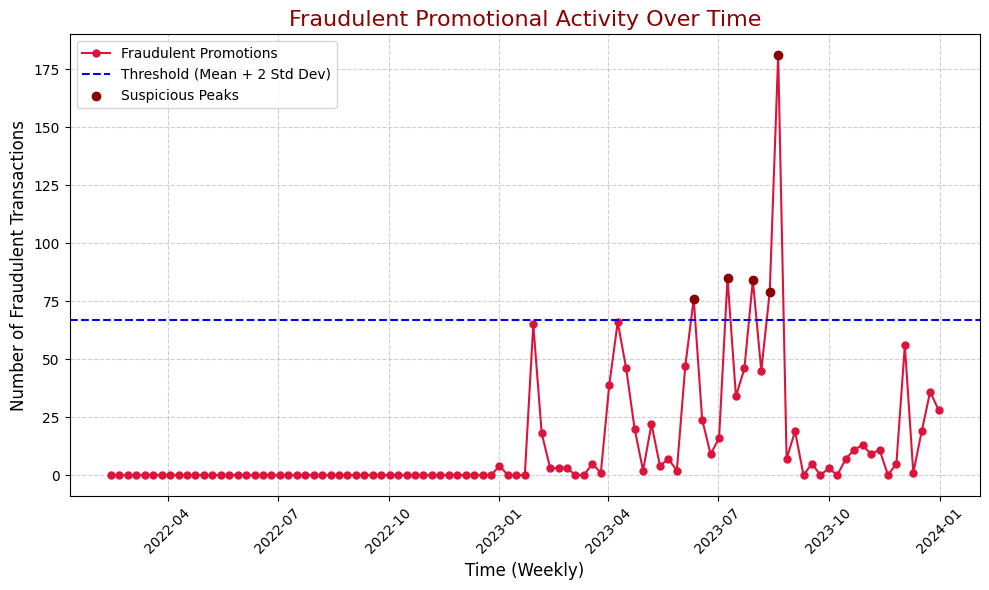

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan nilai promotion_fraud_label benar
df['promotion_fraud_label'] = df['promotion_fraud_label'].astype(bool)  # Ubah menjadi boolean jika perlu

# Filter data fraud berdasarkan label promotion fraud
fraud_data = df[df['promotion_fraud_label'] == True]

# Konversi kolom datetime
fraud_data['transaction_created_datetime'] = pd.to_datetime(fraud_data['transaction_created_datetime'], errors='coerce')

# Tambahkan kolom 'transaction_count_fraud' jika tidak ada
if 'transaction_count_fraud' not in fraud_data.columns:
    fraud_data['transaction_count_fraud'] = 1  # Anggap setiap baris 1 transaksi fraud

# Resample data untuk melihat tren per minggu
fraud_trend = fraud_data.resample('W', on='transaction_created_datetime')['transaction_count_fraud'].sum()

# Hitung threshold sebagai rata-rata + 2 standar deviasi
threshold = fraud_trend.mean() + 2 * fraud_trend.std()

# Plot grafik aktivitas fraud terkait promosi
plt.figure(figsize=(10, 6))
plt.plot(fraud_trend.index, fraud_trend.values, label='Fraudulent Promotions', color='crimson', marker='o', markersize=5)

# Tambahkan garis threshold
plt.axhline(y=threshold, color='blue', linestyle='--', label='Threshold (Mean + 2 Std Dev)', linewidth=1.5)

# Tandai titik-titik yang melampaui threshold
suspicious_points = fraud_trend[fraud_trend > threshold]
plt.scatter(suspicious_points.index, suspicious_points.values, color='darkred', label='Suspicious Peaks', zorder=5)

# Tambahkan detail visual
plt.title('Fraudulent Promotional Activity Over Time', fontsize=16, color='darkred')
plt.xlabel('Time (Weekly)', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Sesuaikan layout agar rapi
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan nilai promotion_fraud_label benar
df['promotion_fraud_label'] = df['promotion_fraud_label'].astype(bool)  # Ubah menjadi boolean jika perlu

# Filter data fraud berdasarkan label promotion fraud
fraud_data = df[df['promotion_fraud_label'] == True]

# Konversi kolom datetime
fraud_data['transaction_created_datetime'] = pd.to_datetime(fraud_data['transaction_created_datetime'], errors='coerce')

# Tambahkan kolom 'transaction_count_fraud' jika tidak ada
if 'transaction_count_fraud' not in fraud_data.columns:
    fraud_data['transaction_count_fraud'] = 1  # Anggap setiap baris 1 transaksi fraud

# Resample data untuk melihat tren per minggu
fraud_trend = fraud_data.resample('W', on='transaction_created_datetime')['transaction_count_fraud'].sum()

# Hitung threshold sebagai rata-rata + 2 standar deviasi
threshold = fraud_trend.mean() + 2 * fraud_trend.std()

# Identifikasi titik yang melampaui threshold (Suspicious Peaks)
suspicious_weeks = fraud_trend[fraud_trend > threshold].index

# Labeli data fraud dengan promotional_overtime
fraud_data['promotional_overtime'] = fraud_data['transaction_created_datetime'].dt.to_period('W').apply(
    lambda x: 1 if x in suspicious_weeks else 0
)

# Dapatkan pasangan buyer_id dan seller_id yang terkait dengan suspicious peaks
unique_pairs = fraud_data[['buyer_id', 'seller_id', 'promotional_overtime']].drop_duplicates()

# Simpan hasil ke file CSV baru hanya dengan kolom 'promotional_overtime'
unique_pairs[['buyer_id', 'seller_id','promotional_overtime']].to_csv('/content/drive/MyDrive/encoding_6.csv', index=False)
pd.read_csv('/content/drive/MyDrive/encoding_6.csv')

,buyer_id,seller_id,promotional_overtime
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,0
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,0
...,...,...,...
10349,1bf267e94144034743bf8f8b013a1503a3cfd90e14b12e...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
10350,4773153c7e22d60933260b4f357504064c5a9e8ad7e22d...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
10351,43033f91de9577fbc76cbfaacafb4f983ababcaa8d9e42...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0
10352,d9c529a1c0ec32904f16367d606a3218f4c6c4228f3892...,d9c529a1c0ec32904f16367d606a3218f4c6c4228f3892...,0


In [ ]:
import pandas as pd

# Load the dataset with buyer_id and seller_id from encoding_6.csv
encoding_df = pd.read_csv('/content/drive/MyDrive/encoding_6.csv')

# Load the main transaction dataset
df_main = pd.read_csv('/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv')

# Merge the main dataset with encoding_df to identify the pairs with overtime promotion
df_main = df_main.merge(encoding_df[['buyer_id', 'seller_id', 'promotional_overtime']],
                        on=['buyer_id', 'seller_id'],
                        how='left')

# Label with 1 if there's a match in encoding_6.csv, else 0
df_main['overtime_promotion'] = df_main['promotional_overtime'].fillna(0).astype(int)

# Drop the extra 'promotional_overtime' column
df_main = df_main.drop(columns=['promotional_overtime'])

# Save the result to a new file
df_main[['overtime_promotion']].to_csv('/content/drive/MyDrive/encoding_with_overtime_promotion.csv', index=False)
pd. read_csv('/content/drive/MyDrive/encoding_with_overtime_promotion.csv')


,overtime_promotion
0,0
1,0
2,0
3,0
4,0
...,...
49995,0
49996,0
49997,0
49998,0


##**Inactivity and Buyer-Seller Interactions**

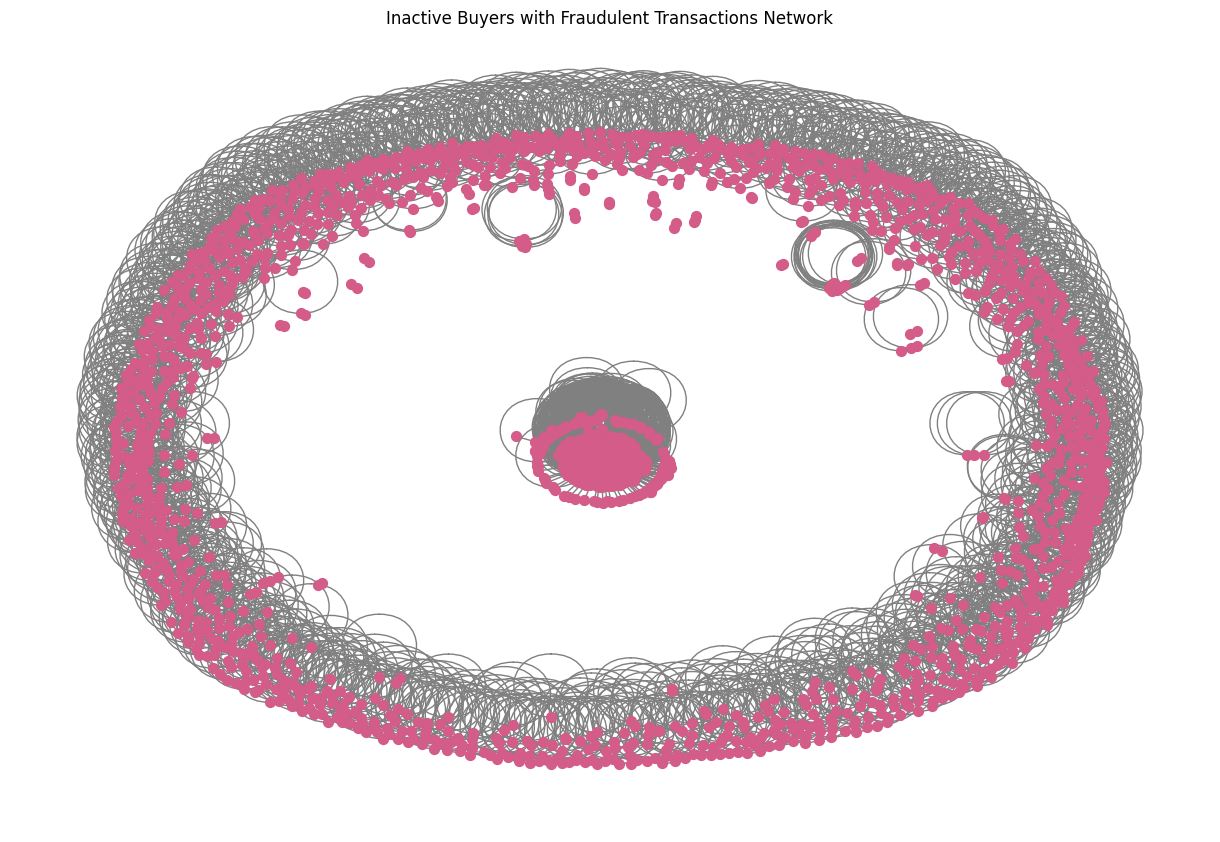

                                            buyer_id  \
0  00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...   
1  00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...   
2  001046b5061e28476b83fe2335b04d3210bed72a2fee17...   
3  001046b5061e28476b83fe2335b04d3210bed72a2fee17...   
4  00119737eef11ff1d30c2061dd1e19c06d963d5a125c92...   

                                           seller_id  inactivity  
0  00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...           0  
1  00048ebf5503ef1dfb03eec05312583eeb2b57320ac682...           0  
2  5d2233f5a1a6435891142442fac09a77809d0c16496f07...           0  
3  5d2233f5a1a6435891142442fac09a77809d0c16496f07...           1  
4  5d2233f5a1a6435891142442fac09a77809d0c16496f07...           0  


In [ ]:

# Pastikan kolom 'transaction_created_datetime' dalam format datetime
df['transaction_created_datetime'] = pd.to_datetime(df['transaction_created_datetime'])

# Hitung perbedaan waktu dalam detik antara transaksi yang dilakukan oleh pembeli yang sama
df['time_diff'] = df.groupby('buyer_id')['transaction_created_datetime'].diff().dt.total_seconds()

# Filter pembeli yang tidak aktif lebih dari satu minggu (604800 detik) dan transaksi yang terdeteksi fraud
inactive_buyers = df[(df['time_diff'] > 604800) & (df['frequency_fraud'] == 'fraud')]

# Tambahkan kolom 'inactivity' untuk memberikan label (1 untuk fraud, 0 untuk tidak fraud)
df['inactivity'] = df.apply(lambda row: 1 if (row['time_diff'] > 604800) and (row['frequency_fraud'] == 'fraud') else 0, axis=1)

# Jika ada data dalam inactive_buyers, buat graph
if not inactive_buyers.empty:
    # Buat graph berdasarkan buyer_id dan seller_id
    G = nx.Graph()
    for _, row in inactive_buyers.iterrows():
        G.add_edge(row['buyer_id'], row['seller_id'])

    # Visualisasi graf
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)  # Tata letak graf
    nx.draw(G, pos, node_size=50, node_color='#D35C88', edge_color='gray', with_labels=False)
    plt.title('Inactive Buyers with Fraudulent Transactions Network')
    plt.show()
else:
    print("Tidak ada pembeli yang tidak aktif dengan transaksi fraud yang ditemukan.")

# Menyimpan data dengan kolom 'inactivity'
output_path = '/content/drive/MyDrive/data_with_inactivity.csv'
df.to_csv(output_path, index=False)

pd.read_csv('/content/drive/MyDrive/data_with_inactivity.csv')


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/data_with_inactivity.csv')

# Ambil hanya kolom 'inactivity'
df_inactivity = df[['inactivity']]

# Simpan dataset yang hanya berisi kolom 'inactivity'
output_path = '/content/drive/MyDrive/data_with_inactivity_only.csv'
df_inactivity.to_csv(output_path, index=False)

# Menampilkan beberapa baris pertama untuk memastikan hasilnya
pd.read_csv('/content/drive/MyDrive/data_with_inactivity_only.csv')

,inactivity
0,0
1,0
2,0
3,1
4,0
...,...
49995,0
49996,0
49997,0
49998,1


##**ENCODING KESELURUHAN FRAUD**

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/fact__paper__digital_payment_transaction_with_fraud_detection_labeled.csv'
data = pd.read_csv(file_path)

# Encoding columns as per the request
data_encoded = data[['transaction_count_fraud', 'frequency_fraud', 'promotion_fraud_label']]

# Encoding 'transaction_count_fraud' column: True -> 1, False -> 0
data_encoded['transaction_count_fraud'] = data_encoded['transaction_count_fraud'].apply(lambda x: 1 if x == True else 0)

# Encoding 'frequency_fraud' column: 'fraud' -> 1, other values -> 0
data_encoded['frequency_fraud'] = data_encoded['frequency_fraud'].apply(lambda x: 1 if x == 'fraud' else 0)

# Encoding 'promotion_fraud_label' column: 'fraud' -> 1, 'unknown' and 'not fraud' -> 0
data_encoded['promotion_fraud_label'] = data_encoded['promotion_fraud_label'].apply(lambda x: 1 if x == 'fraud' else 0)

# Save the encoded data to a new CSV
encoded_file_path = '/content/drive/MyDrive/encoded_fraud_data.csv'
data_encoded.to_csv(encoded_file_path, index=False)

pd.read_csv('/content/drive/MyDrive/encoded_fraud_data.csv')


<ipython-input-48-81e10fb445b3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_encoded['transaction_count_fraud'] = data_encoded['transaction_count_fraud'].apply(lambda x: 1 if x == True else 0)
<ipython-input-48-81e10fb445b3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_encoded['frequency_fraud'] = data_encoded['frequency_fraud'].apply(lambda x: 1 if x == 'fraud' else 0)
<ipython-input-48-81e10fb445b3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,transaction_count_fraud,frequency_fraud,promotion_fraud_label
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
49995,0,1,0
49996,0,1,0
49997,0,1,0
49998,0,1,0


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/Paper ID - Upload Quinjet - Data Set/Data Set Paper ID/dim__paper__company.csv'
data = pd.read_csv(file_path)

# Convert columns to 1 and 0
boolean_columns = ['company_phone_verified_flag', 'company_email_verified_flag', 'user_fraud_flag',
                   'testing_account_flag', 'blacklist_account_flag']

# Apply 1 and 0 conversion
for column in boolean_columns:
    data[column] = data[column].apply(lambda x: 1 if x else 0)

# Select only the encoded columns
encoded_data = data[boolean_columns]

# Save the encoded data to a new CSV file
encoded_file_path = '/content/drive/MyDrive/encoding_fraud2.csv'
encoded_data.to_csv(encoded_file_path, index=False)
pd.read_csv('/content/drive/MyDrive/encoding_fraud2.csv')


,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag
0,1,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,1,0,0,0
...,...,...,...,...,...
49995,1,1,0,0,0
49996,1,1,1,0,0
49997,1,1,0,1,0
49998,1,1,0,0,0


##**Merge Encoding User Flag Keseluruhan**

In [ ]:
import pandas as pd

# Load the files
encoded_fraud_data = pd.read_csv('/content/drive/MyDrive/encoded_fraud_data.csv')
encoding_fraud2 = pd.read_csv('/content/drive/MyDrive/encoding_fraud2.csv')
labeled_transactions = pd.read_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/labeled_transactions.csv')

# Combine the 'fraud_label' columns into one
fraud_labels = pd.concat([encoded_fraud_data[['transaction_count_fraud',	'frequency_fraud',	'promotion_fraud_label']],
                          encoding_fraud2[['company_phone_verified_flag',	'company_email_verified_flag',	'user_fraud_flag',	'testing_account_flag',	'blacklist_account_flag']],
                          labeled_transactions[['fraud_label']]], axis=1)

# Make sure to rename the columns to avoid conflicts
fraud_labels.columns = ['fraud_label_encoded_fraud_data', 'fraud_label_encoding_fraud2', 'fraud_label_labeled_transactions']

# Load the other data files
transaction_overtime_fraud_label = pd.read_csv('/content/drive/MyDrive/transaction_overtime_fraud_label_with_buyers_sellers_sorted.csv')
encoding_4 = pd.read_csv('/content/drive/MyDrive/encoding_4.csv')
cohort_buyer_only = pd.read_csv('/content/drive/MyDrive/cohort_buyer_only.csv')
encoding_with_overtime_promotion = pd.read_csv('/content/drive/MyDrive/encoding_with_overtime_promotion.csv')
data_with_inactivity_only = pd.read_csv('/content/drive/MyDrive/data_with_inactivity_only.csv')

# Merge all the files (assuming they all have a common identifier like 'buyer_id' or 'transaction_id')
merged_data = fraud_labels.merge(transaction_overtime_fraud_label, how='outer', on='transaction_overtime_fraud')
merged_data = merged_data.merge(encoding_4, how='outer', on='graff_fraud')
merged_data = merged_data.merge(cohort_buyer_only, how='outer', on='cohort_buyer')
merged_data = merged_data.merge(encoding_with_overtime_promotion, how='outer', on='overtime_promotion')
merged_data = merged_data.merge(data_with_inactivity_only, how='outer', on='inactivity')

# Count the number of 1's in each 'fraud_label' column and create 'fraud_total' column
merged_data['fraud_total'] = merged_data[['fraud_label_encoded_fraud_data',
                                          'fraud_label_encoding_fraud2',
                                          'fraud_label_labeled_transactions']].sum(axis=1)

# Save the final result to a new CSV
output_path = '/content/drive/MyDrive/final_data_with_fraud_total.csv'
merged_data.to_csv(output_path, index=False)

pd.read_csv('/content/drive/MyDrive/final_data_with_fraud_total.csv')


(50000, 9)


KeyError: 'buyer_id'

In [ ]:
import pandas as pd

# Load the datasets
encoded_fraud_data = pd.read_csv('/content/drive/MyDrive/encoded_fraud_data.csv')
encoding_fraud2 = pd.read_csv('/content/drive/MyDrive/encoding_fraud2.csv')
labeled_transactions = pd.read_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/labeled_transactions.csv')
transaction_overtime_fraud_label = pd.read_csv('/content/drive/MyDrive/transaction_overtime_fraud_label_with_buyers_sellers_sorted.csv')
encoding_4 = pd.read_csv('/content/drive/MyDrive/encoding_4.csv')
cohort_buyer_only = pd.read_csv('/content/drive/MyDrive/cohort_buyer_only.csv')
encoding_with_overtime_promotion = pd.read_csv('/content/drive/MyDrive/encoding_with_overtime_promotion.csv')
data_with_inactivity_only = pd.read_csv('/content/drive/MyDrive/data_with_inactivity_only.csv')

# Combine the fraud-related columns into one DataFrame
fraud_labels = pd.concat([
    encoded_fraud_data[['transaction_count_fraud', 'frequency_fraud', 'promotion_fraud_label']],
    encoding_fraud2[['company_phone_verified_flag', 'company_email_verified_flag',
                     'user_fraud_flag', 'testing_account_flag', 'blacklist_account_flag']],
    labeled_transactions[['fraud_label']]], axis=1)

# Merge the other datasets
merged_data = fraud_labels.merge(transaction_overtime_fraud_label[['transaction_overtime_fraud']], how='outer', left_index=True, right_index=True)
merged_data = merged_data.merge(encoding_4[['graff_fraud']], how='outer', left_index=True, right_index=True)
merged_data = merged_data.merge(cohort_buyer_only[['cohort_buyer']], how='outer', left_index=True, right_index=True)
merged_data = merged_data.merge(encoding_with_overtime_promotion[['overtime_promotion']], how='outer', left_index=True, right_index=True)
merged_data = merged_data.merge(data_with_inactivity_only[['inactivity']], how='outer', left_index=True, right_index=True)

# Save the merged data to a new CSV file
output_path = '/content/drive/MyDrive/merged_fraud_data.csv'
merged_data.to_csv(output_path, index=False)

# Verify the result
pd.read_csv(output_path)


,transaction_count_fraud,frequency_fraud,promotion_fraud_label,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,fraud_label,transaction_overtime_fraud,graff_fraud,cohort_buyer,overtime_promotion,inactivity
0,0,0,0,1,0,1,0,0,0,0.0,1,1,0,0
1,0,0,0,1,0,0,0,0,0,0.0,1,1,0,0
2,0,0,0,1,0,0,0,0,0,0.0,1,1,0,0
3,0,0,0,1,0,0,0,0,0,0.0,0,1,0,1
4,0,0,0,1,1,0,0,0,0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,1,0,1,1,0,0,0,0,0.0,0,1,0,0
49996,0,1,0,1,1,1,0,0,0,0.0,1,1,0,0
49997,0,1,0,1,1,0,1,0,0,0.0,1,1,0,0
49998,0,1,0,1,1,0,0,0,0,0.0,1,1,0,1


In [ ]:
import pandas as pd

# Load the merged fraud data
merged_data = pd.read_csv('/content/drive/MyDrive/merged_fraud_data.csv')

# Load the labeled_transactions data to get 'buyer_id' and 'seller_id'
labeled_transactions = pd.read_csv('/content/drive/MyDrive/Paper ID - Upload Quinjet - Data Set-20241029T021002Z-001 - 1730167832774/labeled_transactions.csv')

# Merge buyer_id and seller_id into the merged data, placing them in front
merged_data = merged_data.merge(labeled_transactions[['buyer_id', 'seller_id']], how='left', left_index=True, right_index=True)

# Reorder the columns so buyer_id and seller_id are at the front
columns_order = ['buyer_id', 'seller_id'] + [col for col in merged_data.columns if col not in ['buyer_id', 'seller_id']]
merged_data = merged_data[columns_order]

# Save the final result to a new CSV file
output_path = '/content/drive/MyDrive/merged_data.csv'
merged_data.to_csv(output_path, index=False)

# Verify the result
pd.read_csv(output_path)


,buyer_id,seller_id,transaction_count_fraud,frequency_fraud,promotion_fraud_label,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,fraud_label,transaction_overtime_fraud,graff_fraud,cohort_buyer,overtime_promotion,inactivity
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,0,0,1,0,1,0,0,0,0.0,1,1,0,0
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,0,0,1,0,0,0,0,0,0.0,1,1,0,0
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,0,0,1,0,0,0,0,0,0.0,1,1,0,0
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,0,0,0,1,0,0,0,0,0,0.0,0,1,0,1
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,0,0,0,1,1,0,0,0,0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,0,1,0,1,1,0,0,0,0,0.0,0,1,0,0
49996,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,1,0,1,1,1,0,0,0,0.0,1,1,0,0
49997,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,0,1,0,1,1,0,1,0,0,0.0,1,1,0,0
49998,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,1,0,1,1,0,0,0,0,0.0,1,1,0,1


In [ ]:
import pandas as pd

# Load the merged data
merged_data = pd.read_csv('/content/drive/MyDrive/merged_data.csv')

# Menentukan kolom yang tidak perlu diubah (buyer_id dan seller_id)
exclude_columns = ['buyer_id', 'seller_id']

# Mengubah tipe data untuk semua kolom kecuali buyer_id dan seller_id menjadi 1 dan 0
for column in merged_data.columns:
    if column not in exclude_columns:
        merged_data[column] = merged_data[column].apply(lambda x: 1 if x else 0)

# Simpan hasilnya ke file baru
output_path = '/content/drive/MyDrive/merged_data_1_0.csv'
merged_data.to_csv(output_path, index=False)

# Verifikasi perubahan
pd.read_csv(output_path)


,buyer_id,seller_id,transaction_count_fraud,frequency_fraud,promotion_fraud_label,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,fraud_label,transaction_overtime_fraud,graff_fraud,cohort_buyer,overtime_promotion,inactivity
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,0,0,1,0,1,0,0,0,0,1,1,0,0
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,0,0,1,0,0,0,0,0,0,1,1,0,0
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,0,0,1,0,0,0,0,0,0,1,1,0,0
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,0,0,0,1,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,0,1,0,1,1,0,0,0,0,0,0,1,0,0
49996,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,1,0,1,1,1,0,0,0,0,1,1,0,0
49997,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,0,1,0,1,1,0,1,0,0,0,1,1,0,0
49998,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,1,0,1,1,0,0,0,0,0,1,1,0,1


In [ ]:
import pandas as pd

# Load the merged data
merged_data = pd.read_csv('/content/drive/MyDrive/merged_data_1_0.csv')

# Menentukan kolom yang tidak perlu dihitung, yaitu 'buyer_id' dan 'seller_id'
exclude_columns = ['buyer_id', 'seller_id']

# Menghitung jumlah '1' dalam setiap baris (kecuali kolom yang tidak dihitung)
merged_data['fraud_count'] = merged_data.drop(columns=exclude_columns).sum(axis=1)

# Simpan hasilnya ke file yang sama
output_path = '/content/drive/MyDrive/merged_data_1_0.csv'
merged_data.to_csv(output_path, index=False)

# Verifikasi perubahan
pd.read_csv(output_path)


,buyer_id,seller_id,transaction_count_fraud,frequency_fraud,promotion_fraud_label,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,fraud_label,transaction_overtime_fraud,graff_fraud,cohort_buyer,overtime_promotion,inactivity,fraud_count
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,0,0,1,0,1,0,0,0,0,1,1,0,0,4
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,0,0,1,0,0,0,0,0,0,1,1,0,0,3
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,0,0,1,0,0,0,0,0,0,1,1,0,0,3
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,0,0,0,1,0,0,0,0,0,0,0,1,0,1,3
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,0,0,0,1,1,0,0,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,5edae69c82a6ef7c97288ea207d4cf9193997657c93d22...,0,1,0,1,1,0,0,0,0,0,0,1,0,0,4
49996,f83e98fe775227a355ded830adb7c59914f2bcfd32965c...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,1,0,1,1,1,0,0,0,0,1,1,0,0,6
49997,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...,0,1,0,1,1,0,1,0,0,0,1,1,0,0,6
49998,a55674077f7db3b4ecb2ba1805e58c966469e00a532dfb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,1,0,1,1,0,0,0,0,0,1,1,0,1,6


In [ ]:
import pandas as pd

# Load the merged data
merged_data = pd.read_csv('/content/drive/MyDrive/merged_data_1_0.csv')

# Menentukan kolom yang tidak perlu dihitung, yaitu 'buyer_id' dan 'seller_id'
exclude_columns = ['buyer_id', 'seller_id']

# Menghitung jumlah '1' dalam setiap baris (kecuali kolom yang tidak dihitung)
merged_data['fraud_count'] = merged_data.drop(columns=exclude_columns).sum(axis=1)

# Urutkan berdasarkan 'fraud_count' dari yang tertinggi
merged_data_sorted = merged_data.sort_values(by='fraud_count', ascending=False)

# Simpan hasil yang telah diurutkan ke file CSV baru
output_path_sorted = '/content/drive/MyDrive/merged_data_sorted.csv'
merged_data_sorted.to_csv(output_path_sorted, index=False)

# Verifikasi perubahan
pd.read_csv(output_path_sorted)


,buyer_id,seller_id,transaction_count_fraud,frequency_fraud,promotion_fraud_label,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,fraud_label,transaction_overtime_fraud,graff_fraud,cohort_buyer,overtime_promotion,inactivity,fraud_count
0,ef958867c89944a43d26df0ada8ff693ff1b7142cbafe0...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,1,0,1,1,1,0,0,1,0,1,1,0,1,16
1,67eef39752c2e17fae2a32bb029b1c38263ce55ec49668...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,1,0,1,1,1,0,0,1,0,1,1,0,1,16
2,b4c5286fbf6443dd4df37457f3ef23a2b71253b1c86452...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,1,0,1,1,0,1,0,1,0,1,1,0,1,16
3,b4c5286fbf6443dd4df37457f3ef23a2b71253b1c86452...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,1,0,1,1,0,1,0,1,0,1,1,0,1,16
4,e0722d2eea37431e2391f759e123a42f7fe0a552f6059d...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,0,1,0,1,1,1,0,0,1,0,1,1,0,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,134e6138699a2b69de56c6bea602f4cb531ad9780d33b2...,134e6138699a2b69de56c6bea602f4cb531ad9780d33b2...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
49996,609313176f2f3d2747cc9735cfe98c5b4f2c6b5a5c93bb...,609313176f2f3d2747cc9735cfe98c5b4f2c6b5a5c93bb...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
49997,8e303ff34d5282083010a5a5d076bd8029d202ce10063c...,8e303ff34d5282083010a5a5d076bd8029d202ce10063c...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49998,c9b29d6d0daafa4fab6307a80523de2537d578e8b84b4b...,c9b29d6d0daafa4fab6307a80523de2537d578e8b84b4b...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df.columns)


Index(['dpt_id', 'dpt_promotion_id', 'buyer_id', 'seller_id',
       'company_kyc_status_name', 'transaction_amount', 'payment_method_name',
       'payment_provider_name', 'transaction_created_datetime',
       'transaction_updated_datetime', 'total_fee_amount',
       'document_type_name', 'promotion_code', 'promotion_name',
       'transaction_promo_cashback_amount', 'daily_transaction_count',
       'transaction_count_fraud', 'time_diff', 'frequency_fraud',
       'promotion_fraud_label', 'inactivity'],
      dtype='object')
